
# Problem Statement

The dataset used in this study is the *Default of credit card clients* . <br> It consists of **30000 observations** that represent distinct credit card clients. Each observation has **24 attributes** that contain information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients  from April 2018 to September 2018.

The first group of variables contains information about the **client personal information**:

1. `ID`: ID of each client, categorical variable
2. `LIMIT_BAL`: Amount of given credit in EGY (includes individual and family/supplementary credit)
3. `SEX`: Gender, categorical variable (1=male, 2=female)
4. `EDUCATION`: level of education, categorical variable (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. `MARRIAGE`: Marital status, categorical variable (1=married, 2=single, 3=others)
6. `AGE`: Age in years, numerical variable

The following attributes contains information about the **delay of the past payment** referred to a specific month:

7. `PAY_0`: Repayment status in September 2018 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
8. `PAY_2`: Repayment status in August 2018 (same scale as before)
9. `PAY_3`: Repayment status in July 2018 (same scale as before)
10. `PAY_4`: Repayment status in June 2018 (same scale as before)
11. `PAY_5`: Repayment status in May 2018 (same scale as before)
12. `PAY_6`: Repayment status in April 2018 (same scale as before)

Other variables instead consider the information related to the **amount of bill statement** (i.e. a monthly report that credit card companies issue to credit card holders in a specific month):

13. `BILL_AMT1`: Amount of bill statement in September, 2018 (EGP)
14. `BILL_AMT2`: Amount of bill statement in August, 2018 (EGP)
15. `BILL_AMT3`: Amount of bill statement in July, 2018 (EGP)
16. `BILL_AMT4`: Amount of bill statement in June, 2018 (EGP)
17. `BILL_AMT5`: Amount of bill statement in May, 2018 (EGP)
18. `BILL_AMT6`: Amount of bill statement in April, 2018 (EGP)

The following variables instead consider the **amount of previous payment** in a specific month:

19. `PAY_AMT1`: Amount of previous payment in September, 2018 (EGP)
20. `PAY_AMT2`: Amount of previous payment in August, 2018 (EGP)
21. `PAY_AMT3`: Amount of previous payment in July, 2018 (EGP)
22. `PAY_AMT4`: Amount of previous payment in June, 2018 (EGP)
23. `PAY_AMT5`: Amount of previous payment in May, 2018 (EGP)
24. `PAY_AMT6`: Amount of previous payment in April, 2018 (EGP)

The last variable is the one to be predicted:

25. `default.payment.next.month`: indicate whether the credit card holders are defaulters or non-defaulters (1=yes, 0=no)

# Importing the Libraries

In [133]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib
import seaborn as sns
import pandas as pd 
import numpy as np
from time import time
from datetime import datetime
%matplotlib inline
#ploty
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode
#scipy
from scipy import stats
from scipy.stats import norm
# for Q-Q plots
import scipy.stats as stats
import gc
import os
import re
from datetime import datetime 
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.base import clone
##models
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,VotingClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb

## metrics
from sklearn.metrics import (accuracy_score, recall_score, precision_score, 
f1_score, classification_report,roc_auc_score,make_scorer,r2_score,mean_squared_error,mean_squared_log_error)
#undersampling
from imblearn.under_sampling import (
    RandomUnderSampler,
    ClusterCentroids
)
##over sampling
from imblearn.over_sampling import SMOTE
##preprocessing
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler,RobustScaler,OrdinalEncoder
from feature_engine.encoding import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from matplotlib.font_manager import FontProperties
pd.set_option('display.max_columns', 100)

import warnings


In [134]:
RANDOM_STATE=42
cust_color = ['#fdc029',
'#f7c14c',
'#f0c268',
'#e8c381',
'#dfc498',
'#d4c5af',
'#c6c6c6',
'#a6a6a8',
'#86868a',
'#68686d',
'#4b4c52',
'#303138',
'#171820',
]

# Read the data

In [135]:
data_path="data/CCs Challenge.csv"

In [136]:
data_df=pd.read_csv(data_path)

# Check the data

In [137]:
print("Default Credit Card Clients data -  rows:",data_df.shape[0]," columns:", data_df.shape[1])

Default Credit Card Clients data -  rows: 30000  columns: 25


the data  has information for 30,000 clients and 25 attributes

##  Glimpse the data

We start by looking to the data features (first 5 rows).

In [138]:
data_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [139]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

Let's look into more details to the data.

In [140]:
data_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

I noticed that 

1. repayment status in september is named `PAY_0`  so I renamed it to a better descriptive name `PAY_1`
2. output label is named `default.payment.next.month`  so I renamed it to a better descriptive name `def_pay`

 I changed the output label to be of category type

In [141]:
# renaming to a better descriptive name
data_df = data_df.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
#drop first attribute"ID"
data_df.drop('ID',axis=1,inplace=True)
# Class label to category
data_df["def_pay"] = data_df["def_pay"].astype('category')
# Set 'category' type to categorical attributes

data_df.sample(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
17027,50000.0,2,1,2,25,-1,-1,-1,-1,-1,-2,390.0,0.0,390.0,780.0,0.0,0.0,0.0,390.0,780.0,0.0,0.0,0.0,1
9320,180000.0,2,1,1,44,0,0,0,0,0,0,97925.0,98817.0,98495.0,96309.0,98484.0,100319.0,4303.0,4200.0,3500.0,3700.0,3600.0,3800.0,0
25262,50000.0,2,1,2,23,2,0,0,0,0,0,49316.0,49061.0,47209.0,47471.0,21571.0,19005.0,4044.0,2138.0,1400.0,431.0,380.0,772.0,1
6140,450000.0,2,2,1,53,-2,-2,-2,-2,-2,-2,2542.0,2545.0,1158.0,1103.0,110.0,187.0,2557.0,1273.0,1109.0,0.0,187.0,2014.0,0
369,20000.0,2,2,1,32,3,2,0,0,0,0,20631.0,20010.0,19703.0,11084.0,10918.0,10985.0,0.0,1168.0,384.0,390.0,632.0,616.0,1


## Check missing data  

Let's check if there is any missing data.

In [142]:
total = data_df.isnull().sum().sort_values(ascending = False)
percent = (data_df.isnull().sum()/data_df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,LIMIT_BAL,SEX,PAY_AMT6,PAY_AMT5,PAY_AMT4,PAY_AMT3,PAY_AMT2,PAY_AMT1,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,BILL_AMT2,BILL_AMT1,PAY_6,PAY_5,PAY_4,PAY_3,PAY_2,PAY_1,AGE,MARRIAGE,EDUCATION,def_pay
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
# Check missing values: no as can be also seen with data.info()
data_df.isnull().values.any()

False

### conclusion
There are no missing data  No missing data imputation

# Categorical variables 

In [144]:
# Categorical variables description
data_df[['SEX', 'EDUCATION', 'MARRIAGE']].describe().T

,count,mean,std,min,25%,50%,75%,max
SEX,30000.0,1.603733,0.489129,1.0,1.0,2.0,2.0,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.0,2.0,2.0,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.0,2.0,2.0,3.0


In [145]:
data_df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [146]:
data_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [147]:
data_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

## conclusion

No missing data, but a few anomalous things:
* EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.
* MARRIAGE has a label 0 that is undocumented

## data cleaning for education

I noticed that category `5` and `6` > unlabeled ,category `0` undocumented
I grouped them to category `4` **others**      

In [148]:
data_df[data_df.EDUCATION==0].shape

(14, 24)

In [149]:
#data cleaning
# replacing 0"anamolous label with 4
fil = (data_df.EDUCATION == 5) | (data_df.EDUCATION == 6) | (data_df.EDUCATION == 0)
data_df.loc[fil, 'EDUCATION'] = 4
data_df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

## data cleaning for mariage

I noticed that category `3` as in documentaion > others ,category `0` undocumented
I grouped 0 to category `3` **others**      

In [150]:
data_df[data_df.MARRIAGE==0].shape

(54, 24)

There are 54 rows with undocumented label but I chose to replacee the anamulous label with 3 not to drop them

In [151]:
# data cleaning
#replacing 0 anamulous label with 3
data_df.loc[data_df.MARRIAGE == 0, 'MARRIAGE'] = 3
data_df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

### conclusion

I interpreted the "other" label in education and mariage as follows

* "Other" in education can be an education lower than the high school level.
* "Other" in marriage could be, for example, "divorced". 

[kaggle](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset/discussion/34608?datasetId=306&sortBy=voteCount&sort=votes)

# repayment status from september 2018 to April 2018

it is deleted as a categorical variable rather than numerical one

In [152]:
# Payment delay description
data_df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.0,0.0,0.0,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.0,0.0,0.0,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.0,0.0,0.0,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.0,0.0,0.0,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.0,0.0,0.0,8.0
PAY_6,30000.0,-0.291100,1.149988,-2.0,-1.0,0.0,0.0,8.0


In [153]:
list_payment=['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for pay in list_payment:
    print(pay+"-----")
    print(list(data_df[pay].value_counts().index))
    print("-----------------")

PAY_1-----
[0, -1, 1, -2, 2, 3, 4, 5, 8, 6, 7]
-----------------
PAY_2-----
[0, -1, 2, -2, 3, 4, 1, 5, 7, 6, 8]
-----------------
PAY_3-----
[0, -1, -2, 2, 3, 4, 7, 6, 5, 1, 8]
-----------------
PAY_4-----
[0, -1, -2, 2, 3, 4, 7, 5, 6, 1, 8]
-----------------
PAY_5-----
[0, -1, -2, 2, 3, 4, 7, 5, 6, 8]
-----------------
PAY_6-----
[0, -1, -2, 2, 3, 4, 7, 6, 5, 8]
-----------------


In [154]:
data_df[(data_df['PAY_1']==-2)|(data_df['PAY_1']==0)].shape

(17496, 24)

There is a large number of clients whose repayment status can be -2 or 0 **undocumented**

According to our documentation, the PAY_n variables indicate the number of months of delay and indicates "pay duly"with -1. Then what is -2? And what is 0? It seems to me the label has to be adjusted to 0 for pay duly.

There are large amount of data with undocumented values(-2,0) so can't be removed)

They all present an undocumented label -2. If 1,2,3, etc are the months of delay, 0 should be labeled 'pay duly' and every negative value should be seen as a 0. I will get to that later

## data cleaning for repayment status

I replaced the `undocumented`values `-2` ,`0` with `0` 
and also replaced `-1` with `0` to indicate no pay delay

In [155]:
# cleaning repayment status by replacing -2,-1,0 with 
fil = (data_df.PAY_1 == -2) | (data_df.PAY_1 == -1) | (data_df.PAY_1 == 0)
data_df.loc[fil, 'PAY_1'] = 0
fil = (data_df.PAY_2 == -2) | (data_df.PAY_2 == -1) | (data_df.PAY_2 == 0)
data_df.loc[fil, 'PAY_2'] = 0
fil = (data_df.PAY_3 == -2) | (data_df.PAY_3 == -1) | (data_df.PAY_3 == 0)
data_df.loc[fil, 'PAY_3'] = 0
fil = (data_df.PAY_4 == -2) | (data_df.PAY_4 == -1) | (data_df.PAY_4 == 0)
data_df.loc[fil, 'PAY_4'] = 0
fil = (data_df.PAY_5 == -2) | (data_df.PAY_5 == -1) | (data_df.PAY_5 == 0)
data_df.loc[fil, 'PAY_5'] = 0
fil = (data_df.PAY_6 == -2) | (data_df.PAY_6 == -1) | (data_df.PAY_6 == 0)
data_df.loc[fil, 'PAY_6'] = 0

# bill statement from september 2018 to august 2018

In [156]:
# Bill Statement description
data_df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
BILL_AMT1,30000.0,51223.330900,73635.860576,-165580.0,3558.75,22381.5,67091.00,964511.0
BILL_AMT2,30000.0,49179.075167,71173.768783,-69777.0,2984.75,21200.0,64006.25,983931.0
BILL_AMT3,30000.0,47013.154800,69349.387427,-157264.0,2666.25,20088.5,60164.75,1664089.0
BILL_AMT4,30000.0,43262.948967,64332.856134,-170000.0,2326.75,19052.0,54506.00,891586.0
BILL_AMT5,30000.0,40311.400967,60797.155770,-81334.0,1763.00,18104.5,50190.50,927171.0
BILL_AMT6,30000.0,38871.760400,59554.107537,-339603.0,1256.00,17071.0,49198.25,961664.0


In [128]:
cond=(data_df['BILL_AMT1']<0)|(data_df['BILL_AMT2']<0)|(data_df['BILL_AMT3']<0)|(data_df['BILL_AMT4']<0)|(data_df['BILL_AMT5']<0)|(data_df['BILL_AMT6']<0)
data_df[cond][data_df.def_pay==0].shape

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(1612, 24)

In [129]:
data_df[cond][data_df.def_pay==1].shape

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



(318, 24)

people with negative bill statement are most likely to be non defaulters

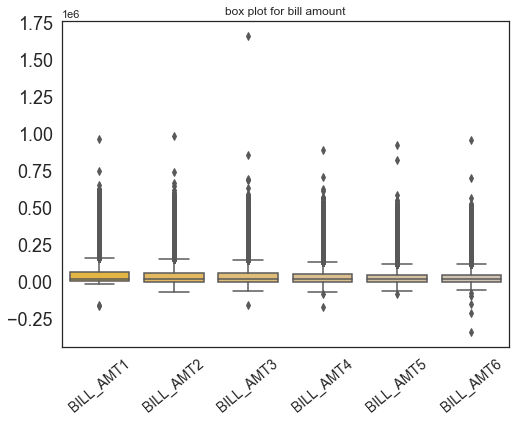

In [157]:
# BOXPLOT
cols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

fig=plt.figure(1, figsize=(8,6))
ax=fig.add_subplot(111)
sns.boxplot(data=data_df[cols],palette=cust_color)
plt.xticks(np.arange(0,6), labels=cols, rotation=40, fontsize=14)
plt.yticks(fontsize=18)
plt.title("box plot for bill amount")
plt.show();

Mostly people who have negative bill statement are likely to be non default

Negative values can be interpreted as credit? 
yes This happens in several cases 

**1)You Overpaid Your Credit Card Bill**
Cardholders can overpay a monthly bill. This happens by mistake when a cardholder manually enters an amount total to more than the current balance when paying online.

**2)You Returned Something You Bought With the Credit Card**
Returning a purchased item for a refund will usually result in the vendor refunding the charge to the applicable credit card. If the cardholder has already paid off any of the card’s balance, the refunded amount may cause a negative balance on the next statement.

**3)You Cashed Out Too Many Rewards**
Some credit cards provide cardholders with bonus rewards or statement credits based on select purchases. If the cardholder pays off the balance each month, a reward or statement credit applied later may show up as a negative balance on a later statement.


 [For more info](https://www.forbes.com/advisor/credit-cards/what-is-a-negative-balance-on-a-credit-card/) 


# amount of previous payment from september 2018 to august 2018

In [158]:
#Previous Payment Description
data_df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe().T

,count,mean,std,min,25%,50%,75%,max
PAY_AMT1,30000.0,5663.580500,16563.280354,0.0,1000.00,2100.0,5006.00,873552.0
PAY_AMT2,30000.0,5921.163500,23040.870402,0.0,833.00,2009.0,5000.00,1684259.0
PAY_AMT3,30000.0,5225.681500,17606.961470,0.0,390.00,1800.0,4505.00,896040.0
PAY_AMT4,30000.0,4826.076867,15666.159744,0.0,296.00,1500.0,4013.25,621000.0
PAY_AMT5,30000.0,4799.387633,15278.305679,0.0,252.50,1500.0,4031.50,426529.0
PAY_AMT6,30000.0,5215.502567,17777.465775,0.0,117.75,1500.0,4000.00,528666.0


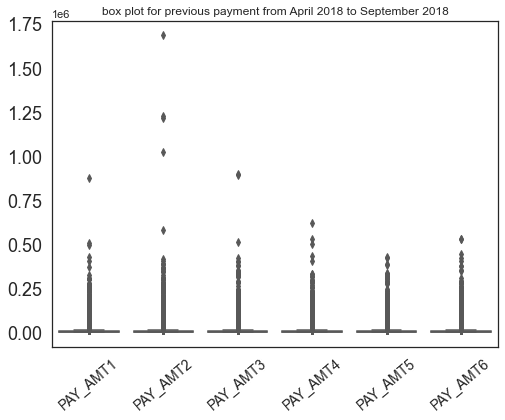

In [159]:
cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

fig=plt.figure(1, figsize=(8,6))
ax=fig.add_subplot(111)
sns.boxplot(data=data_df[cols],palette=cust_color)
plt.xticks(np.arange(0,6), labels=cols, rotation=40, fontsize=14)
plt.yticks(fontsize=18)
plt.title("box plot for previous payment from April 2018 to September 2018")
plt.show();

There is a larege pecentage of outliers in our data of previous payment has to be investigated whether incorrect data or part of it

# amount of credit limit

In [160]:
data_df.LIMIT_BAL.describe().T

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

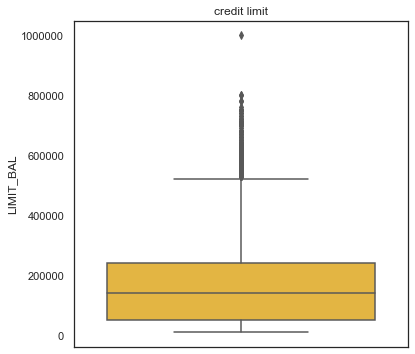

<Figure size 432x288 with 0 Axes>

In [161]:
plt.figure(figsize = (6,6))
plt.title('credit limit')
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(y='LIMIT_BAL', data=data_df, palette=cust_color)
plt.show();
plt.savefig("creditlimit.png")

The maximum value for credit card is 1000000

There are 30,000 distinct credit card clients.  

The average value for the amount of credit card limit is 167,484. The standard deviation is unusually large, max value being 1M.

Education level is mostly graduate school and university.

Most of the clients are either marrined or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

In [162]:
data_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

In [163]:
data_df[data_df["LIMIT_BAL"]==1000000]

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
2197,1000000.0,2,1,1,47,0,0,0,0,0,0,964511.0,983931.0,535020.0,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0


There is only one client with credit limit 1M a femalae ,graduate school ,married at age of 47

In [116]:
data_df[data_df["LIMIT_BAL"]>500000].shape

(206, 24)

There are only 206 clients with credit limit greater than 500k

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



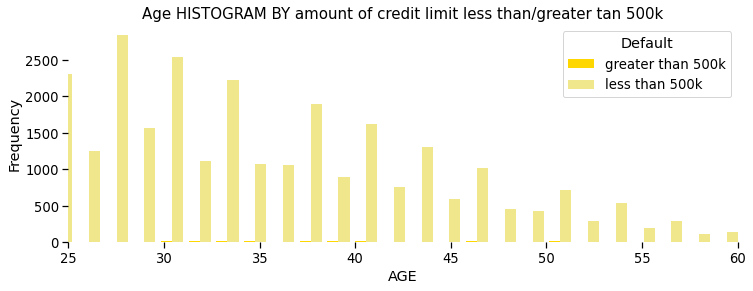

In [40]:
#finding age histogram for people with credit limit less or greater than 500k
x1 = list(data_df[data_df["LIMIT_BAL"]>500000]['AGE'])
x2 = list(data_df[data_df["LIMIT_BAL"]<500000]['AGE'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['gold', 'khaki'])
plt.xlim([25,60])
plt.legend(['greater than 500k', 'less than 500k'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.title('Age HISTOGRAM BY amount of credit limit less than/greater tan 500k', SIZE=15)
plt.box(False)

Text(0.5, 0, 'age')

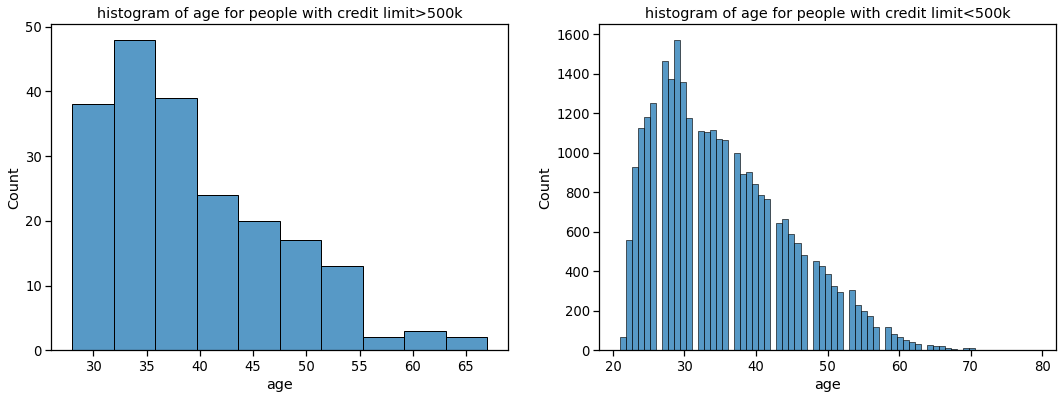

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(x=x1,palette=cust_color,ax=ax[0])
ax[0].set_title("histogram of age for people with credit limit>500k")
ax[0].set_xlabel("age")
sns.histplot(x=x2,ax=ax[1])
ax[1].set_title("histogram of age for people with credit limit<500k")
ax[1].set_xlabel("age")

people with high creit limits are mostly around 35 while people with credit limit less than 500k are around 30s

# further data analysis

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning:

Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later



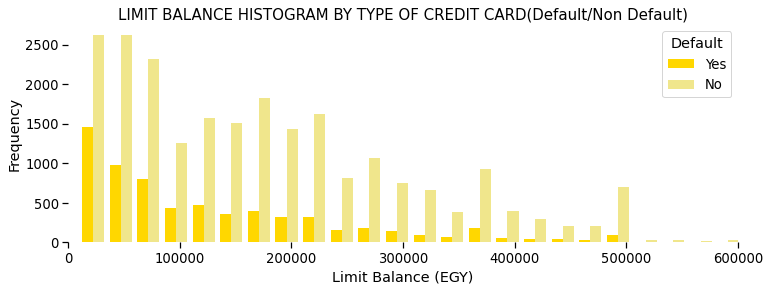

In [42]:
x1 = list(data_df[data_df['def_pay'] == 1]['LIMIT_BAL'])
x2 = list(data_df[data_df['def_pay'] == 0]['LIMIT_BAL'])

plt.figure(figsize=(12,4))
sns.set_context('notebook', font_scale=1.2)
#sns.set_color_codes("pastel")
plt.hist([x1, x2], bins = 40, color=['gold', 'khaki'])
plt.xlim([0,600000])
plt.legend(['Yes', 'No'], title = 'Default', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (EGY)')
plt.ylabel('Frequency')
plt.title('LIMIT BALANCE HISTOGRAM BY TYPE OF CREDIT CARD(Default/Non Default)', SIZE=15)
plt.box(False)
plt.savefig('Limit Balance histogram by type of credit card', format='png', dpi=200, transparent=True);

 most of the defaults are for credit limits ranging from 0 >> 100k 

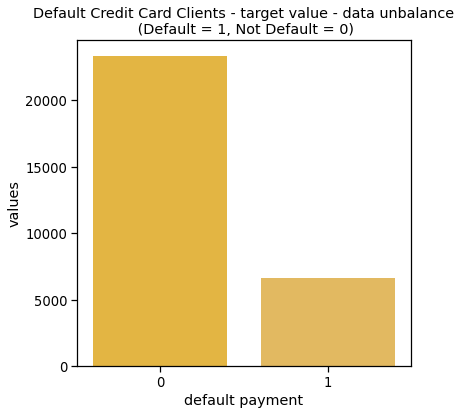

<Figure size 432x288 with 0 Axes>

In [43]:
temp = data_df["def_pay"].value_counts()
df = pd.DataFrame({'default payment': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default Credit Card Clients - target value - data unbalance\n (Default = 1, Not Default = 0)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default payment', y="values", data=df,palette=cust_color)
locs, labels = plt.xticks()
plt.show()
plt.savefig("defaultvsnotdefault.png")

There are 22% defaulters and 78% non defaulters

## gender usage for credit cards

In [44]:
# visualizing gender usage for credit card
df_sex = pd.DataFrame(data_df.groupby('SEX', dropna=False).size()).reset_index()
df_sex.columns = ['sex', 'count']
df_sex['pct'] = df_sex['count']*100/df_sex['count'].sum()
df_sex = df_sex.sort_values('count', ascending=False).reset_index().drop('index',axis=1)
replacement_sex = { 2: "female", 1: "male"}
df_sex["sex"]=df_sex["sex"].replace(replacement_sex)
df_sex

,sex,count,pct
0,female,18112,60.373333
1,male,11888,39.626667


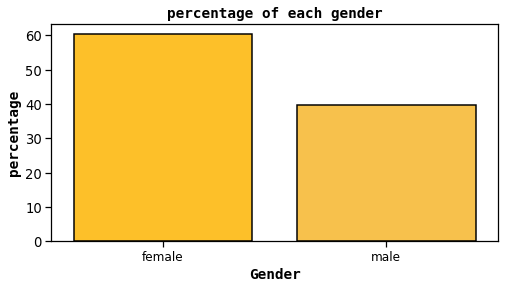

In [45]:
fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x=df_sex["sex"], y=df_sex.pct, palette=cust_color, edgecolor='black', linewidth=1.5, saturation=1.5)

plt.xlabel("Gender", fontname = 'monospace', weight='semibold')
plt.ylabel("percentage", fontname = 'monospace', weight='semibold')
plt.title('percentage of each gender', fontname = 'monospace', weight='bold')
plt.xticks(fontsize=12)
plt.yticks(np.arange(0, df_sex.pct.max()+1, 10))
plt.savefig('genderuageforcreditcard.png')
plt.show()


The higher percentage for credit card users are female which is somehow logical ,the purchase rate for awoman is higher 

##  usage of people with dif education for credit cards

In [48]:
#replacing education with their coreesponding labels
df_education = pd.DataFrame(data_df.groupby('EDUCATION', dropna=False).size()).reset_index()
df_education.columns = ['education', 'count']
df_education['pct'] = df_education['count']*100/df_education['count'].sum()
df_education = df_education.sort_values('count', ascending=False).reset_index().drop('index',axis=1)
replacement_education = { 1: "graduate school", 2: "university",3:"high school",4:"others"}
df_education["education"]=df_education["education"].replace(replacement_education)
df_education

,education,count,pct
0,university,14030,46.766667
1,graduate school,10585,35.283333
2,high school,4917,16.390000
3,others,468,1.560000


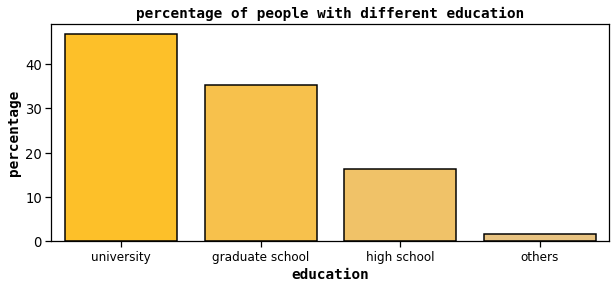

In [49]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x=df_education["education"], y=df_education.pct, palette=cust_color, edgecolor='black', linewidth=1.5, saturation=1.5)

plt.xlabel("education", fontname = 'monospace', weight='semibold')
plt.ylabel("percentage", fontname = 'monospace', weight='semibold')
plt.title('percentage of people with different education', fontname = 'monospace', weight='bold')
plt.xticks(fontsize=12)
#plt.yticks(np.arange(0, df_sex.pct.max()+1, 10))
plt.savefig('educationvscreditcard.png')
plt.show()

Most credit card users are university students graduate school comes in second place

## marital status vs credit card

In [50]:
#replacing marital status with their coreespondi g labels for better visualization
df_mariage = pd.DataFrame(data_df.groupby('MARRIAGE', dropna=False).size()).reset_index()
df_mariage.columns = ['marital status', 'count']
df_mariage['pct'] = df_mariage['count']*100/df_mariage['count'].sum()
df_mariage = df_mariage.sort_values('count', ascending=False).reset_index().drop('index',axis=1)
replacement_mariage = { 1: "married", 2: "single",3:"others",0:"undocumented"}
df_mariage["marital status"]=df_mariage["marital status"].replace(replacement_mariage)
df_mariage

,marital status,count,pct
0,single,15964,53.213333
1,married,13659,45.530000
2,others,377,1.256667


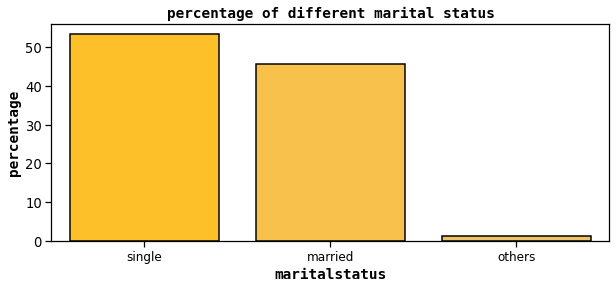

In [51]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x=df_mariage["marital status"], y=df_mariage.pct,palette=cust_color,  edgecolor='black', linewidth=1.5, saturation=1.5)

plt.xlabel("maritalstatus", fontname = 'monospace', weight='semibold')
plt.ylabel("percentage", fontname = 'monospace', weight='semibold')
plt.title('percentage of different marital status', fontname = 'monospace', weight='bold')
plt.xticks(fontsize=12)
plt.savefig('maritalstatusvscreditcard.png')
plt.show()

most of the clients are single in first place and married comes in second place

## credit limit vs gender

In [54]:
df=data_df[['SEX','LIMIT_BAL','MARRIAGE','AGE']]
replacement_marital={ 1: "married", 2: "single",3:"others"}
replacement_sex = { 1: "male", 2: "female"}
df["SEX"]=df["SEX"].replace(replacement_sex)
df["MARRIAGE"]=df["MARRIAGE"].replace(replacement_marital)

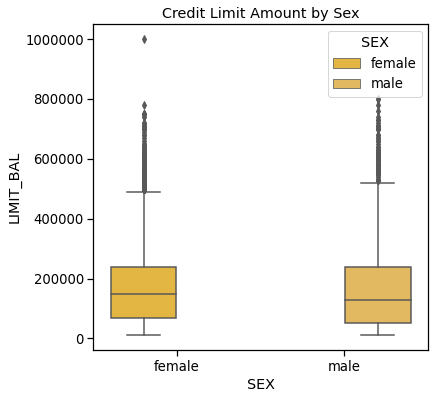

In [55]:
# Credit Limit vs Sex
plt.figure(figsize = (6,6))
plt.title('Credit Limit Amount by Sex')
plt.ticklabel_format(style='plain', axis='y')
sns.boxplot(x='SEX', y='LIMIT_BAL', hue='SEX', data=df, palette=cust_color)
plt.savefig('credit limit amount by sex.png')
plt.show();

The data is evenly distributed amongst males and females.

## marital status vs age vs gender

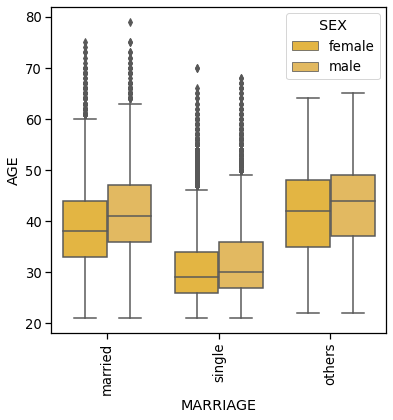

<Figure size 432x288 with 0 Axes>

In [56]:
# Marriage, Age, and Sex
def boxplot_variation(feature1, feature2, feature3, width=16):
    fig, ax1 = plt.subplots(ncols=1, figsize=(width, 6))
    s = sns.boxplot(ax=ax1, x=feature1, y=feature2, hue=feature3,
                    data=df, palette=cust_color)  #palette='bright'
    s.set_xticklabels(s.get_xticklabels(), rotation=90)
    plt.show();
    plt.savefig('mariagevsagevssex.png')
#'SEX','LIMIT_BAL','MARRIAGE'
boxplot_variation('MARRIAGE', 'AGE', 'SEX', 6)

The dataset mostly contains couples in their mid-30s to mid-40s and single people in their mid-20s to early-30s.

## amount of credi limit

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



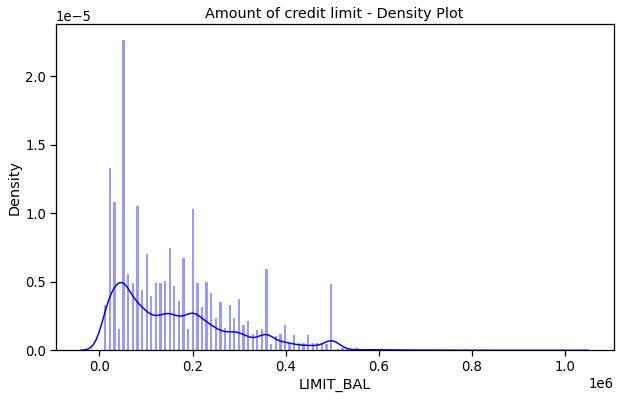

In [57]:
plt.figure(figsize = (10,6))
plt.title('Amount of credit limit - Density Plot')
sns.set_color_codes("pastel")
sns.distplot(data_df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

In [68]:
data_df['LIMIT_BAL'].value_counts().shape

(81,)

There are 81 different values for credit limit. Most people are with credit limit 50k 

In [69]:
data_df['LIMIT_BAL'].value_counts().head(5)

50000.0     3365
20000.0     1976
30000.0     1610
80000.0     1567
200000.0    1528
Name: LIMIT_BAL, dtype: int64

Indeed, the largest number of credit cards are with limit of 50,000 (3365), followed by 20,000 (1976) and 30,000 (1610).

In [58]:
df_credit = pd.DataFrame(data_df.groupby('LIMIT_BAL', dropna=False).size()).reset_index()
df_credit.columns = ['credit amount', 'count']
df_credit['pct'] = df_credit['count']*100/df_credit['count'].sum()
df_credit = df_credit.sort_values('count', ascending=False).reset_index().drop('index',axis=1)
df_credit

,credit amount,count,pct
0,50000.0,3365,11.216667
1,20000.0,1976,6.586667
2,30000.0,1610,5.366667
3,80000.0,1567,5.223333
4,200000.0,1528,5.093333
...,...,...,...
76,800000.0,2,0.006667
77,690000.0,1,0.003333
78,327680.0,1,0.003333
79,760000.0,1,0.003333


In [71]:
df_credit.head(8)

,credit amount,count,pct
0,50000.0,3365,11.216667
1,20000.0,1976,6.586667
2,30000.0,1610,5.366667
3,80000.0,1567,5.223333
4,200000.0,1528,5.093333
5,150000.0,1110,3.700000
6,100000.0,1048,3.493333
7,180000.0,995,3.316667


In [39]:
data_df['LIMIT_BAL'][:7]

0     20000.0
1    120000.0
2     90000.0
3     50000.0
4     50000.0
5     50000.0
6    500000.0
Name: LIMIT_BAL, dtype: float64

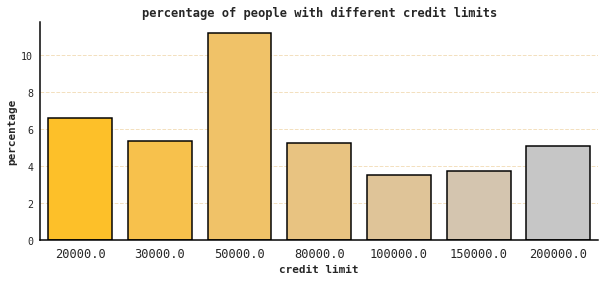

In [72]:
fig, ax = plt.subplots(figsize=(10,4))
sns.barplot(x=df_credit['credit amount'][:7], y=df_credit['pct'][:7],palette=cust_color,  
            edgecolor='black', linewidth=1.5, saturation=1.5)

plt.xlabel("credit limit", fontname = 'monospace', weight='semibold')
plt.ylabel("percentage", fontname = 'monospace', weight='semibold')
plt.title('percentage of people with different credit limits', fontname = 'monospace', weight='bold')
plt.xticks(fontsize=12)
plt.savefig("creditamounthistgram.png")
plt.show()

Indeed, the largest number of credit cards are with limit of 

50,000 >11%

20,000>6%

30,000/80,000,20,000>5%


In [69]:
data_df['LIMIT_BAL'].value_counts().index[:9]

Float64Index([ 50000.0,  20000.0,  30000.0,  80000.0, 200000.0, 150000.0,
              100000.0, 180000.0, 360000.0],
             dtype='float64')

In [59]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins='auto')
    plt.title('Histogram for {}'.format(variable))

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot for {}'.format(variable))

    plt.show()

## diagnostic plot for bill statement

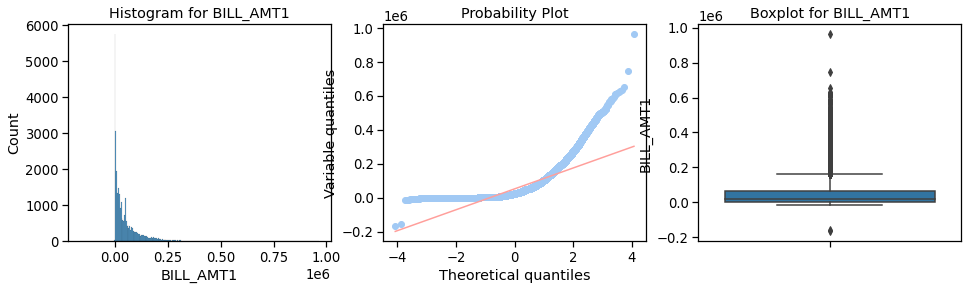

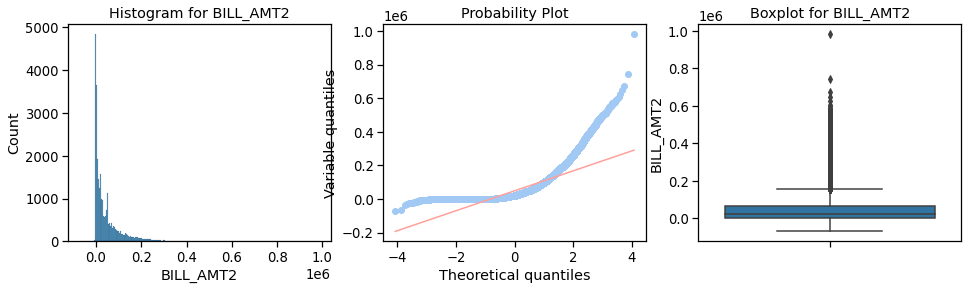

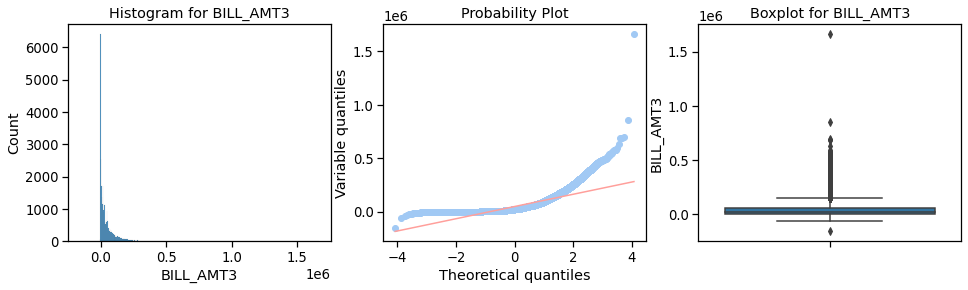

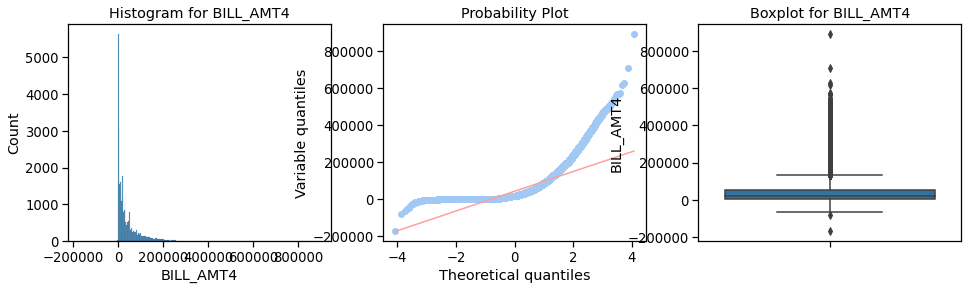

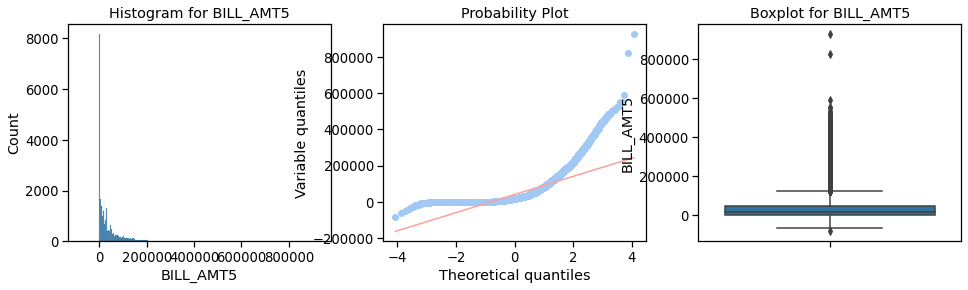

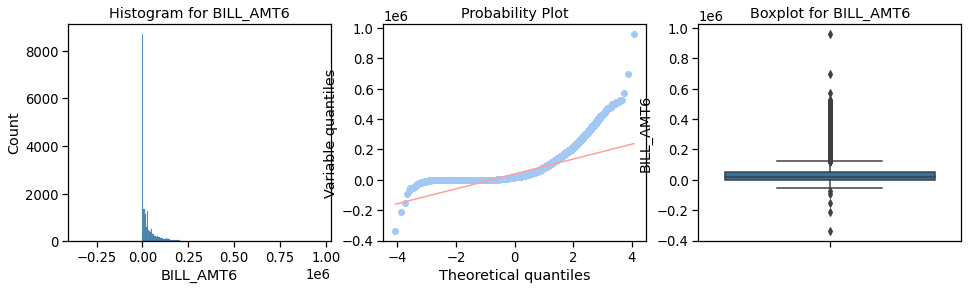

In [60]:
list_bill_amount=['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for bill_amount in list_bill_amount:
     diagnostic_plots(data_df,bill_amount)

 the bill amount have high values but not as previous payments which have large number of outliers

## diagnostic plot for previous payment

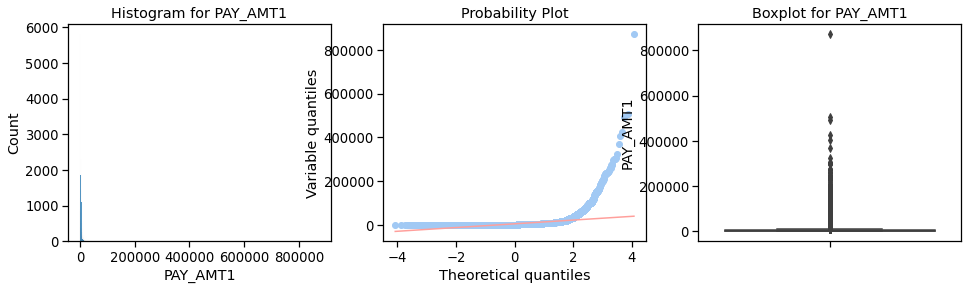

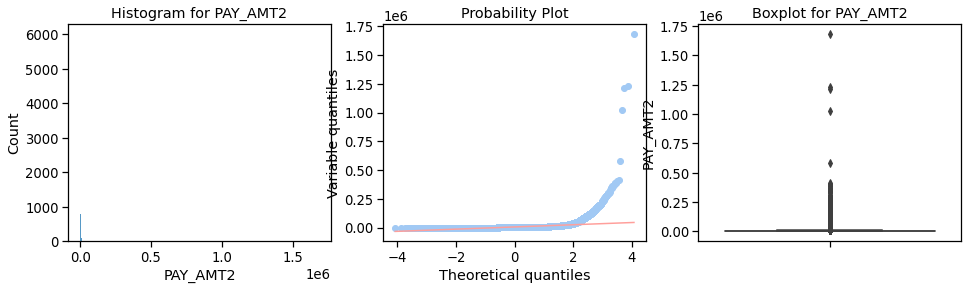

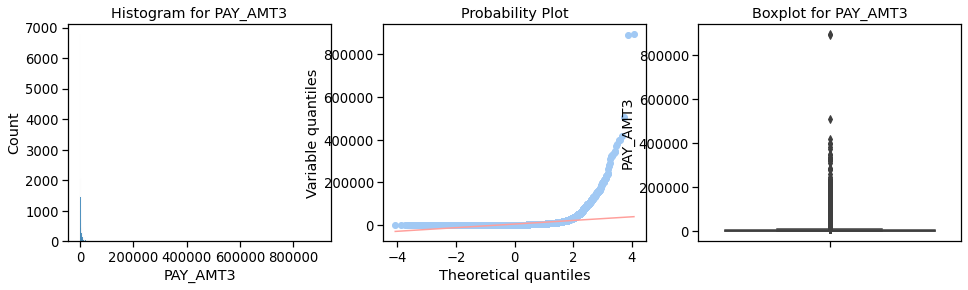

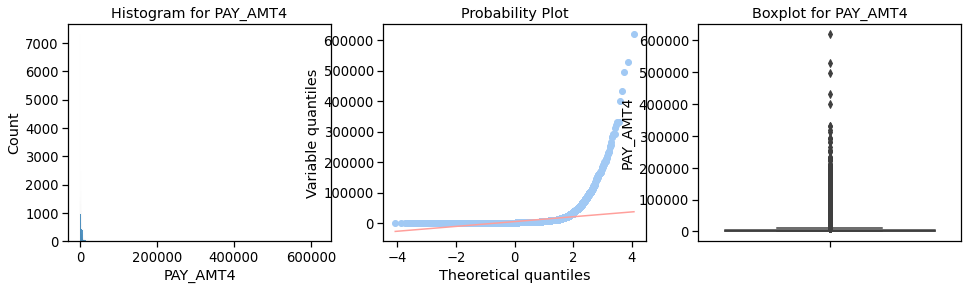

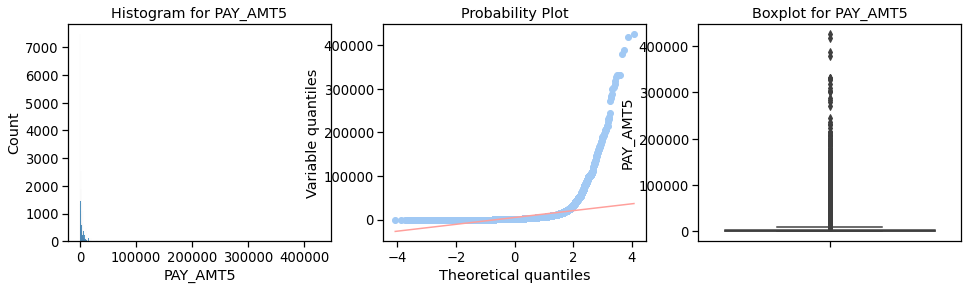

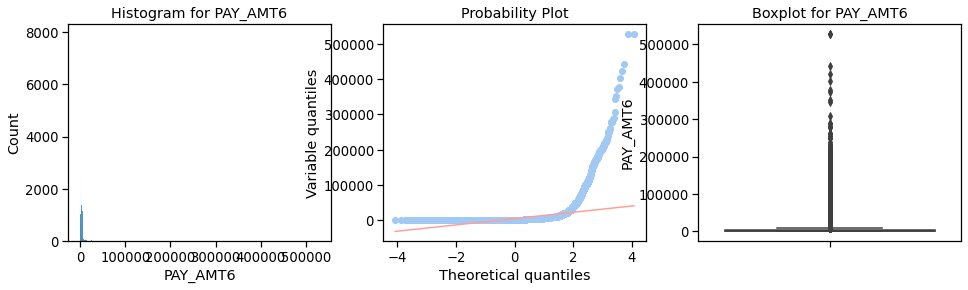

In [73]:
list_payamt=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for paymant_amount in list_payamt:
     diagnostic_plots(data_df,paymant_amount)

By inspecting the paymount of previous payments the range is wide so i tried to figure the client's data

In [82]:
data_df[data_df.PAY_AMT1 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2', 
                          'PAY_AMT1', 'BILL_AMT1', 'def_pay']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,def_pay
2687,500000.0,0,0,367979.0,368199.0,71921.0,0
5687,480000.0,0,0,400000.0,302000.0,106660.0,0
8500,400000.0,0,0,405016.0,405016.0,6500.0,0
12330,300000.0,1,0,324392.0,505000.0,-165580.0,0
25431,170000.0,0,0,167941.0,304815.0,30860.0,0
28003,510000.0,0,0,481382.0,493358.0,71121.0,0
28716,340000.0,0,0,176743.0,873552.0,139808.0,0
29820,400000.0,1,0,394858.0,423903.0,396343.0,0
29867,340000.0,0,0,331641.0,300039.0,44855.0,0
29963,610000.0,0,0,322228.0,323014.0,348392.0,0


In [83]:
data_df[data_df.PAY_AMT2 > 300000][['LIMIT_BAL', 'PAY_1', 'PAY_2', 'BILL_AMT2', 
                          'PAY_AMT1', 'BILL_AMT1', 'def_pay']]

,LIMIT_BAL,PAY_1,PAY_2,BILL_AMT2,PAY_AMT1,BILL_AMT1,def_pay
2592,480000.0,1,0,38929.0,39149.0,-220.0,0
3774,500000.0,0,0,39356.0,39560.0,103880.0,0
5296,500000.0,0,0,-18088.0,4366.0,125.0,0
5400,500000.0,0,0,8970.0,8982.0,27891.0,0
6150,300000.0,1,0,-5973.0,1720.0,-3928.0,1
6864,500000.0,0,0,201402.0,40000.0,192257.0,0
9044,500000.0,0,0,24201.0,24201.0,51465.0,0
11568,430000.0,0,0,960.0,510.0,52930.0,1
11853,360000.0,1,1,-22960.0,0.0,277040.0,0
12829,340000.0,0,0,335584.0,16004.0,327058.0,1


people with high previous payment are most probably to have high credit limit

In [64]:
data_df[data_df.PAY_AMT2 < 300000]['LIMIT_BAL'].value_counts()

50000.0      3365
20000.0      1976
30000.0      1610
80000.0      1566
200000.0     1528
             ... 
740000.0        2
760000.0        1
1000000.0       1
327680.0        1
690000.0        1
Name: LIMIT_BAL, Length: 81, dtype: int64

In [63]:
data_df[data_df.PAY_AMT2 > 300000]['LIMIT_BAL'].value_counts()

500000.0    6
340000.0    3
480000.0    2
430000.0    2
350000.0    1
510000.0    1
520000.0    1
750000.0    1
80000.0     1
360000.0    1
300000.0    1
460000.0    1
Name: LIMIT_BAL, dtype: int64

# Further analyzing high previous payment

In [164]:
x1 = list(data_df[data_df.PAY_AMT1 > 300000]['LIMIT_BAL'])
x2 = list(data_df[data_df.PAY_AMT1 < 300000]['LIMIT_BAL'])

(0.0, 200000.0)

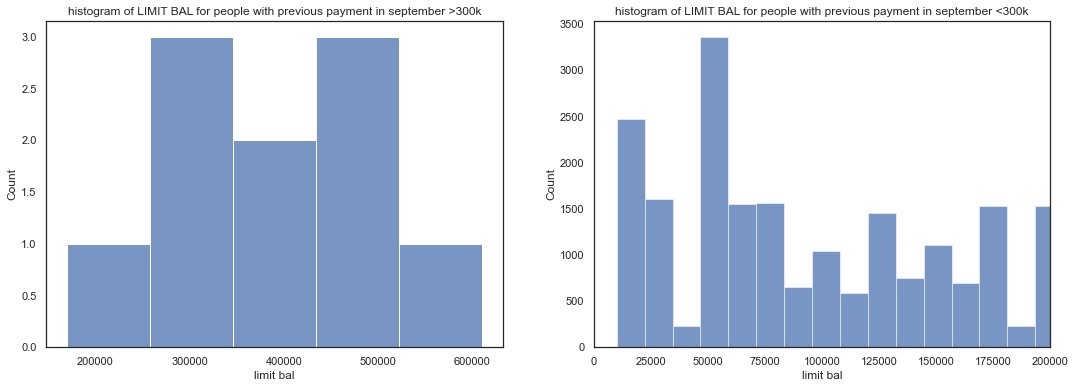

In [165]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.histplot(x=x1,palette=cust_color,ax=ax[0])
ax[0].set_title("histogram of LIMIT BAL for people with previous payment in september >300k")
ax[0].set_xlabel("limit bal")

sns.histplot(x=x2,ax=ax[1])
ax[1].set_title("histogram of LIMIT BAL for people with previous payment in september <300k")
ax[1].set_xlabel("limit bal")
ax[1].set_xlim(0, 200000)

people with high previous payment has high credit limit(500k and 300k) while people with lower previous payment has smaller credit limit(50k)

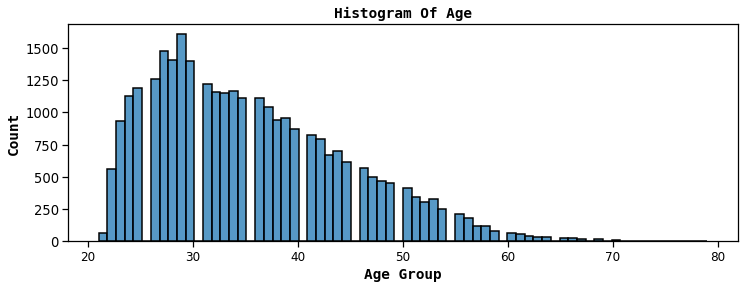

In [75]:
fig, ax = plt.subplots(figsize=(12,4))
sns.histplot(data=data_df, x="AGE", palette=cust_color, edgecolor='black', linewidth=1.5)
plt.xlabel("Age Group", fontname = 'monospace', weight='semibold')
plt.ylabel("Count", fontname = 'monospace', weight='semibold')
plt.title('Histogram Of Age', fontname = 'monospace', weight='bold')
plt.xticks(fontsize=12)
plt.show()

#  Correlation between features

Another relevant point which could affect the classification performances is the correlation among features: the presence of strongly correlated features may lead to a decline in the performances of some classification algorithms which assume that the predictors are all independent. Another benefit from spotting correlation among features is that the same information may be encoded with less attributes, and this could lead to simpler final models. Indeed, some methods suffer from high dimensional datasets (especially distance based ones with a few number of samples), so reducing the dimensions of the feature vectors can make it more trustable and stable, if the discarded dimensions don’t affect significantly the total original information.

The *Pearson’s correlation coefficient* is a statistic that measures the linear correlation between a pair of random variables. In particular, given the random vector $(X, Y)$ :

\begin{equation}
\rho _{X,Y} :=\ \frac{Cov( X,\ Y)}{\sigma _{X} \sigma _{Y}} \ \in \ [ -1,\ 1] \ \subset \ \mathbb{R}
\end{equation}
 
where $Cov( X,\ Y)$ is the Covariance and $\sigma _{X}$ and $\sigma _{Y}$ are respectively the standard deviations of $X$ and $Y$. <br> $\rho _{X,Y}$ has a value bounded between $-1$ and $+1$. 

The higher in absolute value, the stronger the linear correlation is, meaning that on average for each large (w.r.t. the mean of $X$) value  observed, a corresponding large value (w.r.t. the mean of $Y$) is also observed. <br>
Note that the Pearson’s correlation coefficient is only able to capture linear trends, hence it might lead to a value of 0 for strongly non-linearly correlated variables (e.g. quadratic trend).

In [166]:
data_df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'def_pay'],
      dtype='object')

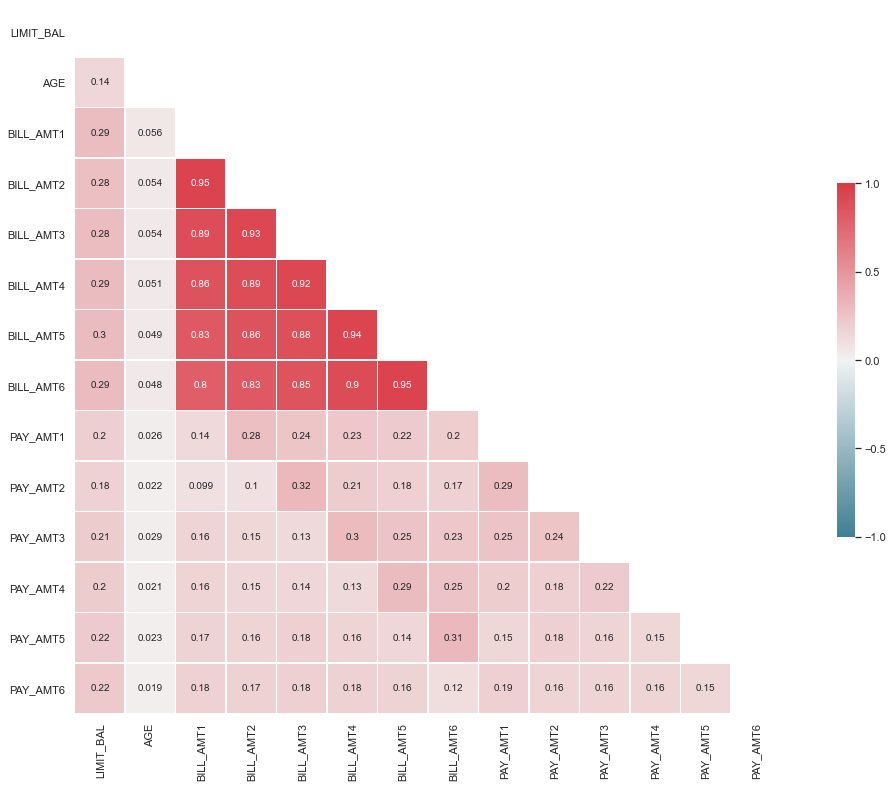

In [170]:
sns.set(style="white", font_scale=1)
numeric = ['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','def_pay']
corr = data_df[numeric].corr() # .corr is used to find corelation

mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 13))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax=sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cmap=cmap, cbar_kws={"shrink": .5}, annot=True, annot_kws={"size": 10})
cbar=ax.collections[0].colorbar
cbar.set_ticks([-1, -0.50, 0, 0.50, 1])
plt.savefig('Fig - Correlation matrix by means of the Pearson’s coefficient for all feature pairs.png')

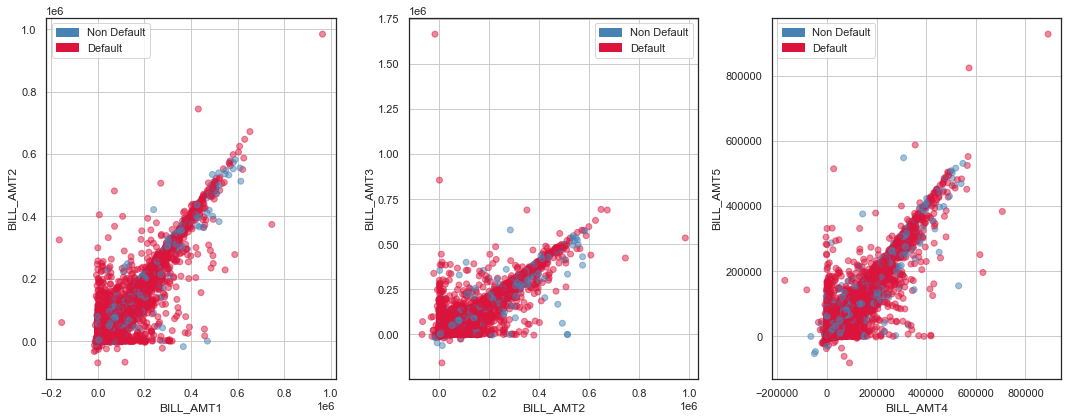

In [171]:
#distribution correlated features -- scatter interaction


data_np=data_df.to_numpy()
target=data_df.def_pay

# variables to 
BILL_AMT1 = data_df['BILL_AMT1'].to_numpy()
BILL_AMT2 = data_df['BILL_AMT2'].to_numpy()
BILL_AMT3 = data_df['BILL_AMT3'].to_numpy()
BILL_AMT4 = data_df['BILL_AMT4'].to_numpy()
BILL_AMT5 = data_df['BILL_AMT5'].to_numpy()
BILL_AMT6 = data_df['BILL_AMT6'].to_numpy()
AGE = data_df['AGE'].to_numpy()
LIMIT_BAL = data_df['LIMIT_BAL'].to_numpy()
PAY_AMT1 = data_df['PAY_AMT1'].to_numpy()

fig, ax = plt.subplots(1,3, figsize= (15,6))

labels=["Non Default","Default"]
pop_a = mpatches.Patch(color='steelblue', label='Non Default')
pop_b = mpatches.Patch(color='crimson', label='Default')
colors=['crimson', 'steelblue']

ax[0].scatter(BILL_AMT1, BILL_AMT2, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('BILL_AMT1')
ax[0].set_ylabel('BILL_AMT2')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(BILL_AMT2, BILL_AMT3, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('BILL_AMT2')
ax[1].set_ylabel('BILL_AMT3')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(BILL_AMT4,BILL_AMT5, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('BILL_AMT4')
ax[2].set_ylabel('BILL_AMT5')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()# let's make good plots
plt.show()

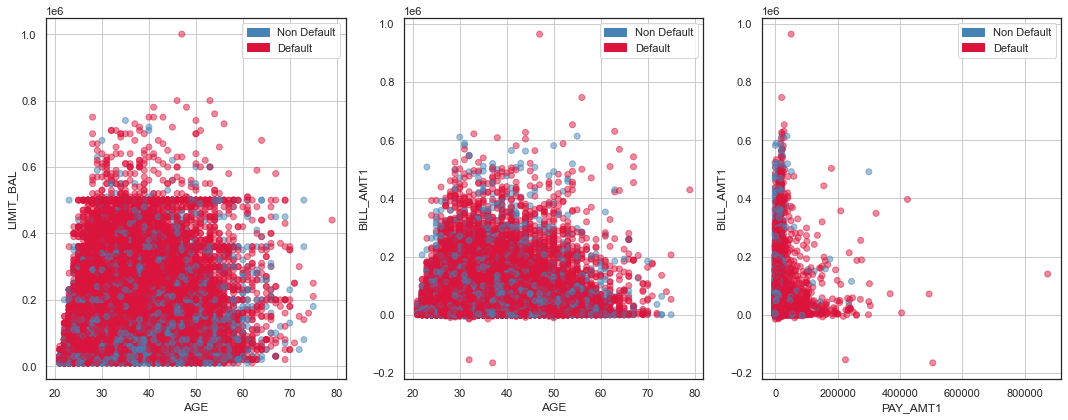

In [169]:
#distribution un-correlated features -- scatter interaction

fig, ax = plt.subplots(1,3, figsize= (15,6))

labels=["Non Default","Default"]
pop_a = mpatches.Patch(color='steelblue', label='Non Default')
pop_b = mpatches.Patch(color='crimson', label='Default')
colors=['crimson', 'steelblue']

ax[0].scatter(AGE, LIMIT_BAL, c=target, cmap=matplotlib.colors.ListedColormap(colors), label=labels, alpha=0.5)
ax[0].grid()
ax[0].set_xlabel('AGE')
ax[0].set_ylabel('LIMIT_BAL')
ax[0].legend(handles= [pop_a,pop_b])

ax[1].scatter(AGE, BILL_AMT1, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[1].grid()
ax[1].set_xlabel('AGE')
ax[1].set_ylabel('BILL_AMT1')
ax[1].legend(handles= [pop_a,pop_b])

ax[2].scatter(PAY_AMT1,BILL_AMT1, c=target, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)
ax[2].grid()
ax[2].set_xlabel('PAY_AMT1')
ax[2].set_ylabel('BILL_AMT1')
ax[2].legend(handles= [pop_a,pop_b])

plt.tight_layout()# let's make good plots
plt.show()

In [173]:
data_df_copy=data_df.copy()

In [174]:
# Set 'category' type to categorical attributes
for att in ['SEX', 'EDUCATION', 'MARRIAGE']:
    data_df[att] = data_df[att].astype('category')

# Helper Functions

## splitting data into train,validation and test datasey

In [175]:
def splitData(df):
    """
    This function takes the data
    and splits it into the train ,validation and test set  
     """
    # Separating features and target
    X=df.drop("def_pay",axis=1, inplace = False)
    y=df['def_pay']   # target default=1 or non-default=0
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_STATE, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=RANDOM_STATE, stratify=y_train_val)
    y_train = y_train.reset_index(drop=True)
    y_val=y_val.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)
    return X_train, X_val, y_train, y_val,X_test,y_test

## selecting Features

In [176]:
def selectFeatures(data_df):
    """
    This function takes the dataframe and returns the dataframe with features whose correlation are greater than 0.92
    """
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] >= 0.92)]
    #print(to_drop) #['BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
    data_df= data_df.drop(data_df[to_drop], axis = 1)
    return data_df

## scaling Features

In [177]:
def scaleFeatures(X_train ,X_val,X_test,robustScaler=True,standardScaler=False,minMaxScaler=False):
        """
        This function takes the train,validation and test dataset "numerical features"
        and scales them either by robustscaler,standard scaler or minmxscaler
        """
        if robustScaler:
            scaler = RobustScaler()
        if standardScaler:
            scaler=StandardScaler()
        if minMaxScaler:
            scaler = MinMaxScaler()
      # fit the scaler to the train set, it will learn the parameters
        scaler.fit(X_train.select_dtypes(exclude='category'))
       # transform train and test sets
        X_train_scaled = scaler.transform(X_train.select_dtypes(exclude='category'))
        X_val_scaled=scaler.transform(X_val.select_dtypes(exclude='category'))
        X_test_scaled = scaler.transform(X_test.select_dtypes(exclude='category'))
        X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.select_dtypes(exclude='category').columns)
        X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_test.select_dtypes(exclude='category').columns)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.select_dtypes(exclude='category').columns)
        return X_train_scaled ,X_val_scaled,X_test_scaled

## get numerical columns

In [178]:
def getNumericalCols(X_train, X_val,X_test):
    """
    This function
    """
    X_train_num=X_train.select_dtypes(exclude='category')
    X_val_num=X_val.select_dtypes(exclude='category')
    X_test_num=X_test.select_dtypes(exclude='category')
    return X_train_num,X_val_num,X_test_num

## categoricaL variable encoding

In [179]:
def oneHotEncodeData(X_train, X_val,X_test):
    """
    This function takes the train ,validation and test set
    returns them oneHotEncoded
    """
    ohe_enc = OneHotEncoder(variables=['SEX', 'EDUCATION', 'MARRIAGE'],drop_last=False)
    ohe_enc.fit(X_train.select_dtypes(include='category'))
    X_train_ohe = ohe_enc.transform(X_train.select_dtypes(include='category')).reset_index(drop=True)
    X_val_ohe=ohe_enc.transform(X_val.select_dtypes(include='category')).reset_index(drop=True)
    X_test_ohe=ohe_enc.transform(X_test.select_dtypes(include='category')).reset_index(drop=True)
    return X_train_ohe ,X_val_ohe,X_test_ohe


## concatenated scaled and oneHotEncoded Features

In [180]:
def concatenateData():
    """
    This function concatenates the data after scaling and oneHotEncoding
    and returns X_train,X_val,X_test
    """
    X_train=pd.concat([X_train_scaled ,X_train_ohe],axis=1)
    X_val=pd.concat([X_val_scaled ,X_val_ohe],axis=1)
    X_test=pd.concat([X_test_scaled ,X_test_ohe],axis=1)
    return X_train,X_val,X_test

## printing default and notdefault output 

In [181]:
def printDefNonDefsize():
        """
        Thisfunction prints the size of defaultersand non defaulters in
        train ,val and test set
        """
        print("Training set:")
        print(f" + Non-defaulters (y=0): {len(y_train[y_train==0])}")
        print(f" + Defaulters (y=1):\t {len(y_train[y_train==1])}")

        print("validation set:")
        print(f" + Non-defaulters (y=0): {len(y_val[y_val==0])}")
        print(f" + Defaulters (y=1):\t {len(y_val[y_val==1])}")

        print("Test set:")
        print(f" + Non-defaulters (y=0): {len(y_test[y_test==0])}")
        print(f" + Defaulters (y=1):\t {len(y_test[y_test==1])}")

## train and predict

In [182]:
def train_predict(classifier,X_train,X_val,y_val,y_train,X_test,y_test): 
    '''
    inputs:
       - classifier: the learning algorithm to be trained and predicted on
    '''
    
    results = {}
    
    # Fit the classifier to the training data and Calculate the time
    start_train = time()
    classifier = classifier.fit(X_train, y_train)
    end_train = time()
    results['train_time'] = round((end_train-start_train), 2)

    # Predict the training/testing labels and Calculate the time
    start_test = time()
    y_pred_train = classifier.predict(X_train)
    y_pred_val = classifier.predict(X_val)
    y_pred_test = classifier.predict(X_test)
    end_test = time()   
    results['pred_time'] = round((end_test-start_test), 2)
            
    # Model evaluation (training,validation/testing data) using accuracy
    results['acc_train'] = round(accuracy_score(y_train, y_pred_train), 2)
    results['acc_val'] = round(accuracy_score(y_val, y_pred_val), 2)
    results['acc_test'] = round(accuracy_score(y_test, y_pred_test), 2)

    #model evaluation using precision
    results["precision"]= round(precision_score(y_val, y_pred_val),2)

    #model evaluation using recall
    results["recall_train"]=round(recall_score(y_train, y_pred_train, pos_label=1),2)
    results["recall_val"]=round(recall_score(y_val, y_pred_val, pos_label=1),2)
    results["recall_test"]=round(recall_score(y_test, y_pred_test, pos_label=1),2)
    
    
    # Model evaluation (training/testing data) using f1-score
    results['f1_train'] = round(f1_score(y_train, y_pred_train), 2)
    results['f1_val'] = round(f1_score(y_val, y_pred_val), 2)
    results['f1_test'] = round(f1_score(y_test, y_pred_test), 2)
    
    # Display classification_report
    report = classification_report(y_val, y_pred_val)
       
    
    # Return the results
    return results, report

## plotting evaluation Metrics

In [183]:
def eval_plot(labels, y_label, title,clf_evaluation):
    """
    This function takes the classifiers' list
    and plots the output graph of the evaluation metric given
    """
    
   
    clf1 = [clf_evaluation[legend[0]][labels[0]], clf_evaluation[legend[0]][labels[1]]]
    clf2 = [clf_evaluation[legend[1]][labels[0]], clf_evaluation[legend[1]][labels[1]]]
    clf3 = [clf_evaluation[legend[2]][labels[0]], clf_evaluation[legend[2]][labels[1]]]

    x = np.arange(len(labels))  # the label locations
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots(figsize= (6,6))
    ax.bar(x - width/2, clf1, width, label=legend[0])
    ax.bar(x + width/2, clf2, width, label=legend[1])
    ax.bar(x + width*3/2, clf3, width, label=legend[2])

    # Add labels, title, and legend
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Add bars annotation
    for i in ax.patches:
        # get_x pulls left or right; get_height pushes up or down
        ax.text(i.get_x()+(width/2), i.get_height()+0.01,
                str(i.get_height()), fontsize=11,
                color='black', ha='center')

    plt.show()

# Classification Algorithms

Each algorithm is trained on dataset with different preprocessing techniques combined:

The algorithms considered are:
- Logistic Regression
-  Decision Trees)
- SVM ( RBF)
- Random forest 
- xgboostclassifier
- catboostclasssifier

`logistic regression`
- I used it as a baseline model :before linear regression :feature selection and feature engineering(robust scaler & onehot encoder)

**pros:**

-well known and accepted

-Interpretable .

-gives comparitevely good results.

**cons:**

-statistical assumptions .

-exhaustive feature engineering.


`Decision Trees`
- I used it as a baseline model for its interpretability

**pros:**

-Interpretable .

-no feature engineering needed

**cons:**

-highly subjective to overfitting .

`SVC`

I did feature engineering before using it (robust scaling and one hot encoding)

scaling the features can help speed up the training process

**cons**

Not interpretable





# feature engineering 

## with robustscaler and ohe

I did feature engineering(robust scaler and ohe) for 

-logistic regression.

-svc(decreases the time for finding kernel)


In [184]:
#trying logistic regression ,svc ,decision trees
clf_LR = LogisticRegression(random_state=RANDOM_STATE,class_weight="balanced",max_iter=150,n_jobs=-1)
clf_SVM = SVC(random_state=RANDOM_STATE,class_weight="balanced")
clf_DT = DecisionTreeClassifier(random_state=RANDOM_STATE,class_weight="balanced")

### logistic regression

the logistic regression has some statistical assumption that should be met to say that output model is trustworthy of its results

1.No perfect multicollinearity: There should be no perfect linear relationship between two or more of the predictors.

2.Normally distributed errors: the residuals (ei)are random, normally distributed with a mean of 0.

3.Homoscedasticity: At each level of the predictor variable(s), the variance of the residual terms should be constant.

**1)I chose the features from the correlattion matrix with values less 0.92**

**2)I did some feature engineering(robust scaler) and oneHotEncoding instead of integer encoding since it won't expand feature space
(each categorical attribute has at most 4 categories)**

In [185]:
df_data=selectFeatures(data_df)
X_train, X_val, y_train, y_val,X_test,y_test=splitData(df_data)
X_train_scaled ,X_val_scaled,X_test_scaled=scaleFeatures(X_train ,X_val,X_test)
X_train_ohe ,X_val_ohe,X_test_ohe=oneHotEncodeData(X_train, X_val,X_test)

In [186]:
printDefNonDefsize()

Training set:
 + Non-defaulters (y=0): 16822
 + Defaulters (y=1):	 4778
validation set:
 + Non-defaulters (y=0): 4206
 + Defaulters (y=1):	 1194
Test set:
 + Non-defaulters (y=0): 2336
 + Defaulters (y=1):	 664


#### results of logistic regression

In [210]:
# Compare evaluation of the different classifiers
clf_evaluation = {}
clf_report = {}
clf_evaluation[clf_LR.__class__.__name__] = train_predict(clf_LR,X_train, X_val, y_val,y_train,X_test,y_test )[0]
clf_report[clf_LR.__class__.__name__] = train_predict(clf_LR,X_train, X_val, y_val, y_train,X_test,y_test)[1]

### support vector classifier

In [188]:
X_train, X_val, y_train, y_val,X_test,y_test=splitData(data_df)
X_train_scaled ,X_val_scaled,X_test_scaled=scaleFeatures(X_train ,X_val,X_test)
X_train_ohe ,X_val_ohe,X_test_ohe=oneHotEncodeData(X_train, X_val,X_test)
X_train,X_val,X_test=concatenateData()
printDefNonDefsize()

Training set:
 + Non-defaulters (y=0): 16822
 + Defaulters (y=1):	 4778
validation set:
 + Non-defaulters (y=0): 4206
 + Defaulters (y=1):	 1194
Test set:
 + Non-defaulters (y=0): 2336
 + Defaulters (y=1):	 664


#### results on support vector classifier

In [189]:
clf_evaluation[clf_SVM.__class__.__name__] = train_predict(clf_SVM,X_train, X_val, y_val,y_train,X_test,y_test )[0]
clf_report[clf_SVM.__class__.__name__] = train_predict(clf_SVM,X_train, X_val, y_val, y_train,X_test,y_test)[1]

### Decision trees

In [191]:
X_train, X_val, y_train, y_val,X_test,y_test=splitData(data_df)

In [192]:
printDefNonDefsize()

Training set:
 + Non-defaulters (y=0): 16822
 + Defaulters (y=1):	 4778
validation set:
 + Non-defaulters (y=0): 4206
 + Defaulters (y=1):	 1194
Test set:
 + Non-defaulters (y=0): 2336
 + Defaulters (y=1):	 664


#### results on Decision Trees

In [193]:
clf_evaluation[clf_DT.__class__.__name__] = train_predict(clf_DT,X_train, X_val, y_val,y_train,X_test,y_test )[0]
clf_report[clf_DT.__class__.__name__] = train_predict(clf_DT,X_train, X_val, y_val, y_train,X_test,y_test)[1]

### Comparing results of logisti regression,Decision Trees and Support Vector Classifier

In [218]:
results = pd.DataFrame.from_dict(clf_evaluation)
results

,LogisticRegression,SVC,DecisionTreeClassifier
train_time,2.45,22.87,0.35
pred_time,0.03,44.24,0.01
acc_train,0.78,0.79,1.00
acc_val,0.77,0.77,0.73
acc_test,0.78,0.79,0.73
precision,0.49,0.49,0.39
recall_train,0.56,0.58,1.00
recall_val,0.57,0.57,0.41
recall_test,0.54,0.54,0.39
f1_train,0.53,0.54,1.00


#### conclusion

**svc** takes alot of time for training and predicting

**logistic regression** gives good recall for val and test as well as **SVC*

**Decision Trees** gives lower results

In [212]:
#this should be set to be used for eval_plot
clf_list = [clf_LR, clf_SVM,clf_DT]
legend=[]
for i in range(len(clf_list)):
    legend.append(clf_list[i].__class__.__name__)

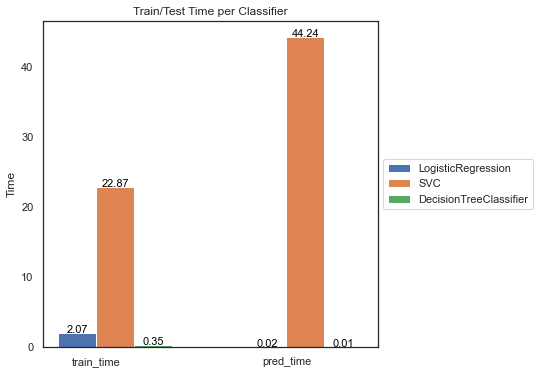

In [213]:
labels = ['train_time', 'pred_time']
y_label = 'Time'
title = 'Train/Test Time per Classifier'
eval_plot(labels, y_label, title,clf_evaluation)

support vector classifier takes the longest time to train and predict

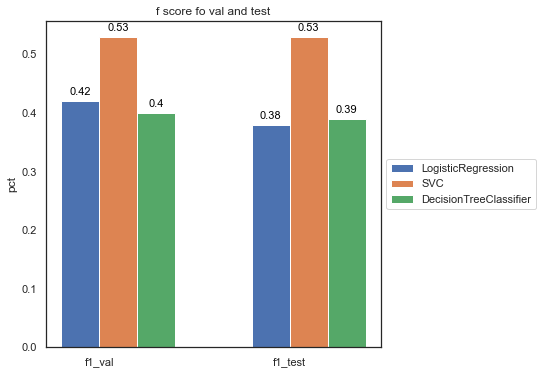

In [198]:
labels = ['f1_val', 'f1_test']
y_label = 'pct'
title = 'f score fo val and test'
eval_plot(labels, y_label, title,clf_evaluation)

**SVC** and **logistic regression** gives good Fscore for val and test set

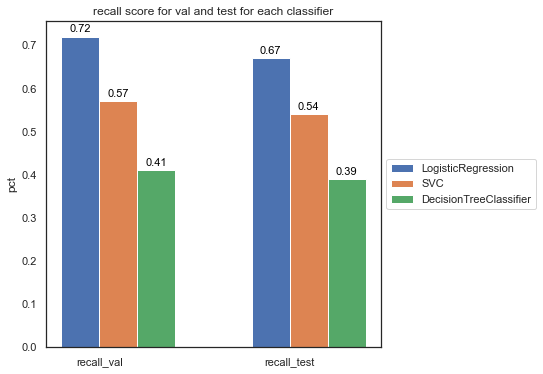

In [200]:
labels = ['recall_val', 'recall_test']
y_label = 'pct'
title = 'recall score for val and test for each classifier'
eval_plot(labels, y_label, title,clf_evaluation)

**logistic regression** and **svc** gives same results for recall score for validation and test set

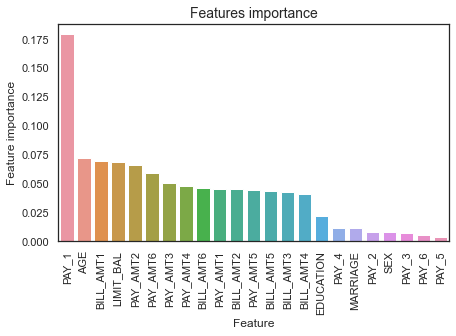

In [201]:
#feature importance for Decision trees
tmp = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': clf_DT.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

the repayment status in September 2018 has the highest contibution to output in Decision tree 
second comes age

### for ensemble methods :random forest,xgboost,catboost

In [202]:
#ration of non-defaulters to defaulters
ratioOfNegToPos=round(16822/4778)  

In [203]:
import xgboost as xgb
clf_RF = RandomForestClassifier(n_jobs=-1, 
                             random_state=RANDOM_STATE, criterion='gini',
                             n_estimators=100,class_weight="balanced",
                             verbose=False)
clf_xgb= xgb.XGBClassifier(scale_pos_weight=ratioOfNegToPos,objective='binary:logistic',eta=0.039,silent=True,use_label_encoder =False
                       ,subsample=0.8,colsample_bytree=0.9,random_seed = RANDOM_STATE,tree_method="gpu_hist",eval_metric='auc')
clf_catboost=CatBoostClassifier(silent = True,iterations=500,scale_pos_weight=ratioOfNegToPos,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2 )

In [204]:
clf_evaluation_ensemble={}
clf_report_ensemble={}  

#### Random Forests

In [220]:
#for random forest
clf_evaluation_ensemble["random forest"] = train_predict(clf_RF,X_train, X_val, y_val,y_train,X_test,y_test )[0]
clf_report_ensemble["random forest"] = train_predict(clf_RF,X_train, X_val, y_val, y_train,X_test,y_test)[1]

#### xgboost

In [206]:
X_train, X_val, y_train, y_val,X_test,y_test=splitData(data_df_copy)

In [207]:
#for xgboost
clf_evaluation_ensemble["xgboost"] = train_predict(clf_xgb,X_train, X_val, y_val,y_train,X_test,y_test )[0]
clf_report_ensemble["xgboost"] = train_predict(clf_xgb,X_train, X_val, y_val, y_train,X_test,y_test)[1]

[10:21:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "random_seed", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[10:21:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "random_seed", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




#### catboost

In [208]:
#catboost
clf_evaluation_ensemble["catboost"] = train_predict(clf_catboost,X_train, X_val, y_val,y_train,X_test,y_test )[0]
clf_report_ensemble["catboost"] = train_predict(clf_catboost,X_train, X_val, y_val, y_train,X_test,y_test)[1]

In [209]:
pd.DataFrame.from_dict(clf_evaluation_ensemble)

,random forest,xgboost,catboost
train_time,0.82,0.89,82.46
pred_time,0.50,0.02,0.05
acc_train,1.00,0.78,0.90
acc_val,0.81,0.75,0.78
acc_test,0.82,0.75,0.78
precision,0.64,0.45,0.50
recall_train,1.00,0.71,0.91
recall_val,0.33,0.65,0.59
recall_test,0.34,0.63,0.58
f1_train,1.00,0.58,0.80


**xgboost** gives the best recall on test and validation set better than catboost and random forest
**catboost** takes the longest time for training

In [224]:
#this should be set to be used for eval_plot
legend=[]
clf_list_ensemble=["random forest","xgboost","catboost"]
for i in clf_list_ensemble:
    legend.append(i)

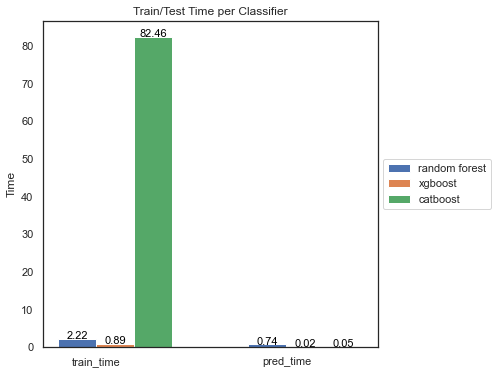

In [225]:
labels = ['train_time', 'pred_time']
y_label = 'Time'
title = 'Train/Test Time per Classifier'
eval_plot(labels, y_label, title,clf_evaluation_ensemble)

**catboost** take the longest training time and on the other hand a short time for prediction

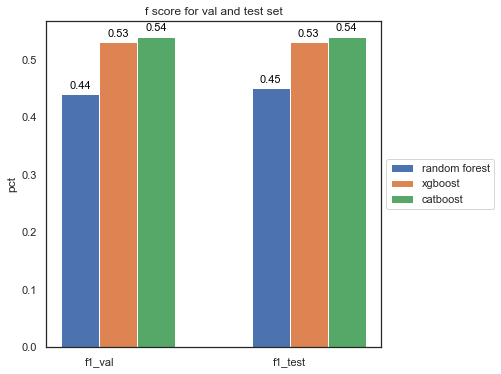

In [226]:
labels = ['f1_val', 'f1_test']
y_label = 'pct'
title = 'f score for val and test set'
eval_plot(labels, y_label, title,clf_evaluation_ensemble)

xgboost has the highest **Fscore** for validation and test set

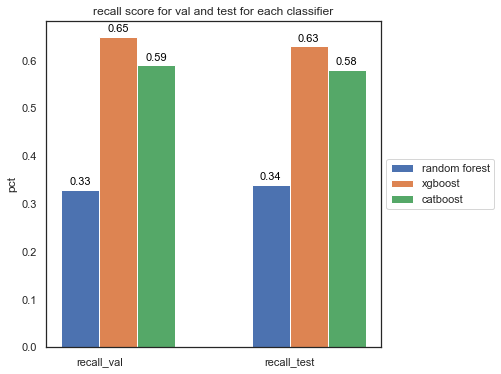

In [227]:
labels = ['recall_val', 'recall_test']
y_label = 'pct'
title = 'recall score for val and test for each classifier'
eval_plot(labels, y_label, title,clf_evaluation_ensemble)

xgboost has the highest **recall score** for validation and test set

### Feature Importance for Random Forest

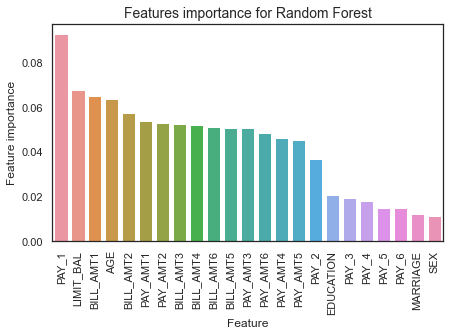

In [223]:
#feature importance for random forest
tmp = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': clf_RF.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance for Random Forest',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

for random forest ,pay_1 ,LIMIT_BAL ,Bill_AMT1 and age are the most important features

### Feature Importance for Xgboost

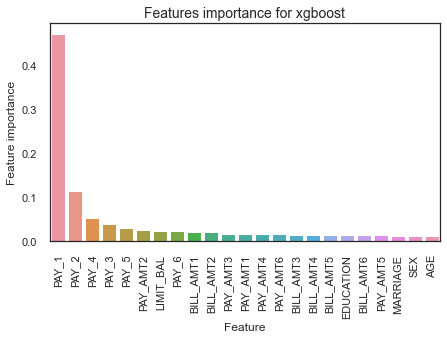

In [326]:
#feature importance for xgboost
tmp = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': clf_xgb.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance for xgboost',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

for xgboost ,Pay_1 is the most contributing to output

### feature importance for catboost

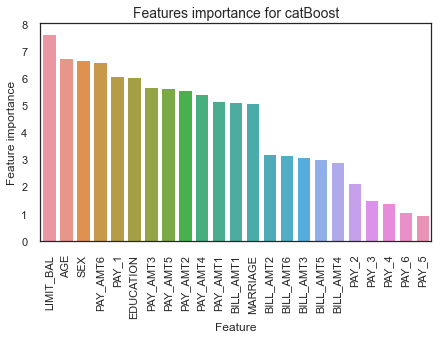

In [327]:
#feature importance for catboost
tmp = pd.DataFrame({'Feature': X_train.columns, 'Feature importance': clf_catboost.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance for catBoost',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()   

for catboost ,the most important features are LIMIT_BAL,AGE,SEX AND PAY_AMT6

## undersampling

in `undersampling` I rescaled before undersampling because some of the algorithms are distance based measure so highly sensitive 
to distances

### random undersampler

In [329]:
randomSampler=RandomUnderSampler(
        sampling_strategy='auto',
        random_state=RANDOM_STATE,
        replacement=False)

In [330]:
X_train, X_val, y_train, y_val,X_test,y_test=splitData(data_df)
X_train_scaled ,X_val_scaled,X_test_scaled=scaleFeatures(X_train ,X_val,X_test)
X_train_ohe ,X_val_ohe,X_test_ohe=oneHotEncodeData(X_train, X_val,X_test)
X_train,X_val,X_test=concatenateData()
X_downsampled, y_downsampled =  randomSampler.fit_resample(X_train, y_train)

#### trying logistic classifier,DT,SVC

In [331]:
#defining classifiers
clf_LR = LogisticRegression(random_state=RANDOM_STATE,max_iter=150,n_jobs=-1)
clf_SVM = SVC(random_state=RANDOM_STATE)
clf_DT = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf_list=[clf_LR,clf_SVM,clf_DT]

In [332]:
clf_evaluation_downSamp = {}
clf_report_downSamp = {}

for clf in clf_list:
    clf_evaluation_downSamp[clf.__class__.__name__] = train_predict(clf,X_downsampled, X_val, y_val,y_downsampled,X_test,y_test)[0]
    clf_report_downSamp[clf.__class__.__name__] = train_predict(clf,X_downsampled, X_val, y_val, y_downsampled,X_test,y_test)[1]

In [333]:
for key in clf_report_downSamp:
    print(key)
    print(clf_report_downSamp[key])
    print('---------------------------------------------------------')


LogisticRegression
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4206
           1       0.49      0.57      0.52      1194

    accuracy                           0.77      5400
   macro avg       0.68      0.70      0.69      5400
weighted avg       0.79      0.77      0.78      5400

---------------------------------------------------------
SVC
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4206
           1       0.50      0.56      0.53      1194

    accuracy                           0.78      5400
   macro avg       0.69      0.70      0.69      5400
weighted avg       0.79      0.78      0.78      5400

---------------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.85      0.60      0.71      4206
           1       0.31      0.62      0.41      1194

    accuracy        

In [334]:
pd.DataFrame.from_dict(clf_evaluation_downSamp)

,LogisticRegression,SVC,DecisionTreeClassifier
train_time,1.80,3.85,0.13
pred_time,0.02,11.91,0.01
acc_train,0.70,0.71,1.00
acc_val,0.77,0.78,0.61
acc_test,0.78,0.79,0.62
precision,0.49,0.50,0.31
recall_train,0.56,0.57,1.00
recall_val,0.57,0.56,0.62
recall_test,0.54,0.53,0.58
f1_train,0.65,0.66,1.00


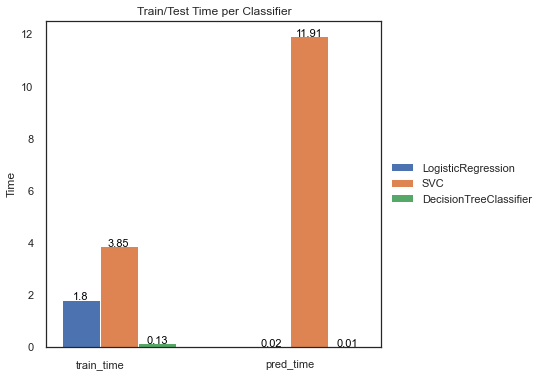

In [335]:
#this should be set to be used for eval_plot
legend=[]
for i in range(len(clf_list)):
    legend.append(clf_list[i].__class__.__name__)

labels = ['train_time', 'pred_time']
y_label = 'Time'
title = 'Train/Test Time per Classifier'
eval_plot(labels, y_label, title,clf_evaluation_downSamp)

**SVC** takes a shorter time in training than before because data is downsampled but still the longest

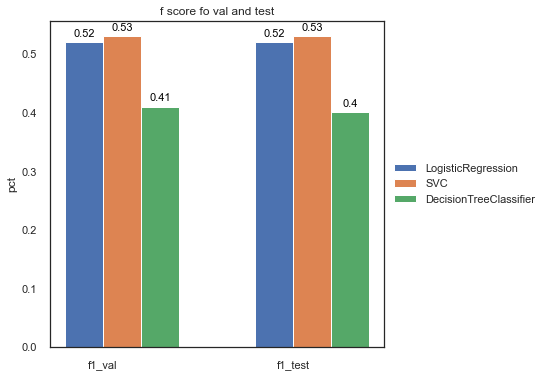

In [336]:
labels = ['f1_val', 'f1_test']
y_label = 'pct'
title = 'f score for val and test set for each classifier'
eval_plot(labels, y_label, title,clf_evaluation_downSamp)



**support vector classifier** gives the highest F score for validation and test set
**logistic regression** comes in the second place

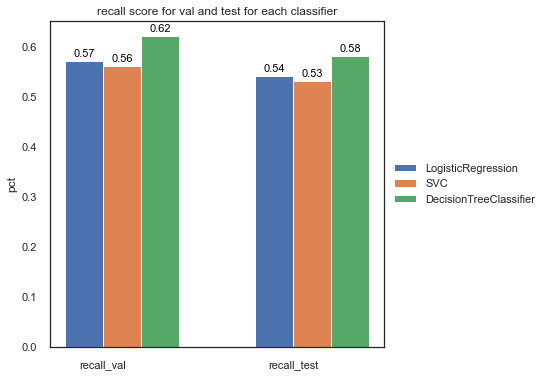

In [337]:
labels = ['recall_val', 'recall_test']
y_label = 'pct'
title = 'recall score for val and test for each classifier'
eval_plot(labels, y_label, title,clf_evaluation_downSamp)

**Decision trees** gives the best recall score for validation and test set it improved from before

#### trying ensemble methods

In [338]:
clf_RF = RandomForestClassifier(n_jobs=-1, 
                             random_state=RANDOM_STATE, criterion='gini',
                             n_estimators=100,
                             verbose=False)
clf_xgb= XGBClassifier(objective='binary:logistic',eta=0.039,silent=True,
                       subsample=0.8,colsample_bytree=0.9,random_seed = RANDOM_STATE,use_label_encoder =False
                       ,eval_metric='auc')
clf_catboost=CatBoostClassifier(silent = True,iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2 )

In [339]:
clf_evaluation_ensemble_randunder={}
clf_report_ensemble_randunder={}

##### random Forest

In [340]:
#for random forest
clf_evaluation_ensemble_randunder["random forest"] = train_predict(clf_RF,X_downsampled, X_val, y_val,y_downsampled,X_test,y_test)[0]
clf_report_ensemble_randunder["random forest"] = train_predict(clf_RF,X_downsampled, X_val, y_val,y_downsampled,X_test,y_test)[1]

In [341]:
#xgboost
clf_evaluation_ensemble_randunder["xgboost"] = train_predict(clf_xgb,X_downsampled, X_val, y_val,y_downsampled,X_test,y_test)[0]
clf_report_ensemble_randunder["xgboost"] = train_predict(clf_xgb,X_downsampled, X_val, y_val,y_downsampled,X_test,y_test)[1]

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:48:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "random_seed", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\NourhanElaraby\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[23:48:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "random_seed", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [342]:
#catboost
clf_evaluation_ensemble_randunder["catboost"] = train_predict(clf_catboost,X_downsampled, X_val, y_val,y_downsampled,X_test,y_test)[0]
clf_report_ensemble_randunder["catboost"] = train_predict(clf_catboost,X_downsampled, X_val, y_val,y_downsampled,X_test,y_test)[1]

In [343]:
for key in clf_report_ensemble_randunder:
    print(key)
    print(clf_report_ensemble_randunder[key])
    print('---------------------------------------------------------')



random forest
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4206
           1       0.44      0.63      0.52      1194

    accuracy                           0.74      5400
   macro avg       0.66      0.70      0.67      5400
weighted avg       0.78      0.74      0.75      5400

---------------------------------------------------------
xgboost
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4206
           1       0.46      0.64      0.53      1194

    accuracy                           0.75      5400
   macro avg       0.67      0.71      0.68      5400
weighted avg       0.79      0.75      0.77      5400

---------------------------------------------------------
catboost
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4206
           1       0.44      0.64      0.52      1194

    accuracy                       

In [344]:
pd.DataFrame.from_dict(clf_evaluation_ensemble_randunder)

,random forest,xgboost,catboost
train_time,0.38,0.75,49.12
pred_time,0.49,0.02,0.03
acc_train,1.00,0.76,0.94
acc_val,0.74,0.75,0.74
acc_test,0.74,0.76,0.75
precision,0.44,0.46,0.44
recall_train,1.00,0.69,0.92
recall_val,0.63,0.64,0.64
recall_test,0.63,0.62,0.62
f1_train,1.00,0.74,0.94


In [345]:
#this should be set to be used for eval_plot
legend=[]
clf_list_ensemble=["random forest","xgboost","catboost"]
for i in clf_list_ensemble:
    legend.append(i)

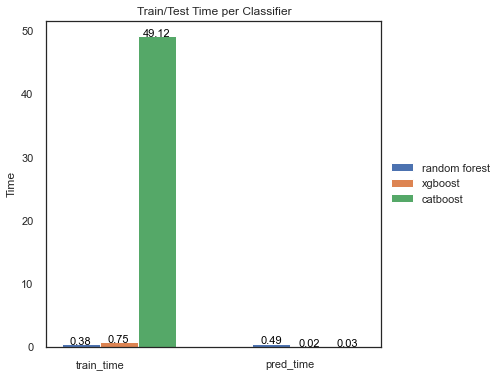

In [346]:
labels = ['train_time', 'pred_time']
y_label = 'Time'
title = 'Train/Test Time per Classifier'
eval_plot(labels, y_label, title,clf_evaluation_ensemble_randunder)

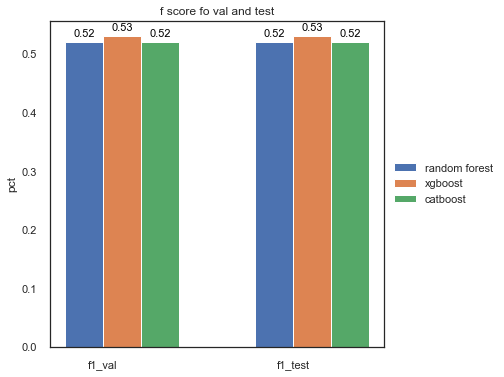

In [347]:
labels = ['f1_val', 'f1_test']
y_label = 'pct'
title = 'f score fo val and test'
eval_plot(labels, y_label, title,clf_evaluation_ensemble_randunder)

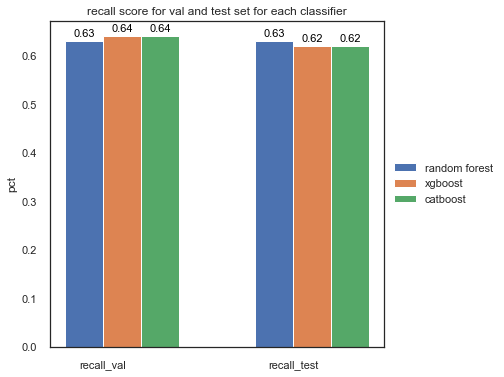

In [348]:
labels = ['recall_val', 'recall_test']
y_label = 'pct'
title = 'recall score for val and test set for each classifier'
eval_plot(labels, y_label, title,clf_evaluation_ensemble_randunder)


The recall score is improved for three lassifiers

### clusterCentroids

Cluster Centroids make use of K-means algorithm to perform undersampling. After finding the cluster centroids on the majority class points, the algorithm selects the instances belonging to the cluster (labelled with the majority class), which are furthest from the cluster centroid in feature space. These data points are considered as the most unimportant instance. On the contrary, the instance belonging to the majority class, that is nearest to the cluster centroid in feature space, is considered to be the most important instance. In this way, instances belonging to the majority class are removed on the basis of their importance.
<br><br>
<img src="https://github.com/robertofranceschi/default-credit-card-prediction/blob/master/images/undersampling-cluster_centroids.png?raw=true" />
<br>
<div align="center"> <i>Example of Cluster Centroids application on a trivial dataset</i> </div>
<br>
In particular, given two class which has respectively $N$ and $M$ data points with $N<M$, the algoritm trains a K-Means on points labelled with the majority class label, with $k = N$, the cardinality of the set of minority data points. <br>
Then for each cluster, it replace the data points of the majority class with a new point whose coordinates correspond to the cluster centroid's coordinates. So we undersample majority class by forming clusters and replacing it with cluster centroids.


In [349]:
clusterCentroids=ClusterCentroids(random_state=RANDOM_STATE)

In [350]:
 X_train, X_val, y_train, y_val,X_test,y_test=splitData(data_df)
X_train_scaled ,X_val_scaled,X_test_scaled=scaleFeatures(X_train ,X_val,X_test)
X_train_ohe ,X_val_ohe,X_test_ohe=oneHotEncodeData(X_train, X_val,X_test)
X_train,X_val,X_test=concatenateData()
X_downsampled_clust, y_downsampled_clus =  randomSampler.fit_resample(X_train, y_train)

#### trying logistic classifier,DT,SVC

In [351]:
clf_LR = LogisticRegression(random_state=RANDOM_STATE,max_iter=150,n_jobs=-1)
clf_SVM = SVC(random_state=RANDOM_STATE)
clf_DT = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf_list=[clf_LR,clf_SVM,clf_DT]

In [352]:
clf_evaluation_undSamp_cluster = {}
clf_report_undSamp_cluster = {}

for clf in clf_list:
    clf_evaluation_undSamp_cluster[clf.__class__.__name__] = train_predict(clf,X_downsampled_clust, X_val, y_val,y_downsampled_clus,X_test,y_test)[0]
    clf_report_undSamp_cluster[clf.__class__.__name__] = train_predict(clf,X_downsampled_clust, X_val, y_val, y_downsampled_clus,X_test,y_test)[1]

In [353]:
for key in clf_report_undSamp_cluster:
    print(key)
    print(clf_report_undSamp_cluster[key])
    print('---------------------------------------------------------')


LogisticRegression
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      4206
           1       0.49      0.57      0.52      1194

    accuracy                           0.77      5400
   macro avg       0.68      0.70      0.69      5400
weighted avg       0.79      0.77      0.78      5400

---------------------------------------------------------
SVC
              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4206
           1       0.50      0.56      0.53      1194

    accuracy                           0.78      5400
   macro avg       0.69      0.70      0.69      5400
weighted avg       0.79      0.78      0.78      5400

---------------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.85      0.60      0.71      4206
           1       0.31      0.62      0.41      1194

    accuracy        

In [354]:
pd.DataFrame.from_dict(clf_evaluation_undSamp_cluster)

,LogisticRegression,SVC,DecisionTreeClassifier
train_time,1.63,4.01,0.12
pred_time,0.01,12.11,0.01
acc_train,0.70,0.71,1.00
acc_val,0.77,0.78,0.61
acc_test,0.78,0.79,0.62
precision,0.49,0.50,0.31
recall_train,0.56,0.57,1.00
recall_val,0.57,0.56,0.62
recall_test,0.54,0.53,0.58
f1_train,0.65,0.66,1.00


In [355]:
#this should be set to be used for eval_plot
legend=[]
for i in range(len(clf_list)):
    legend.append(clf_list[i].__class__.__name__)

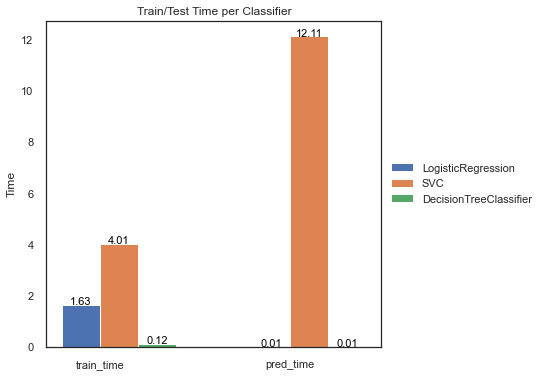

In [356]:
labels = ['train_time', 'pred_time']
y_label = 'Time'
title = 'Train/Test Time per Classifier'
eval_plot(labels, y_label, title,clf_evaluation_undSamp_cluster)



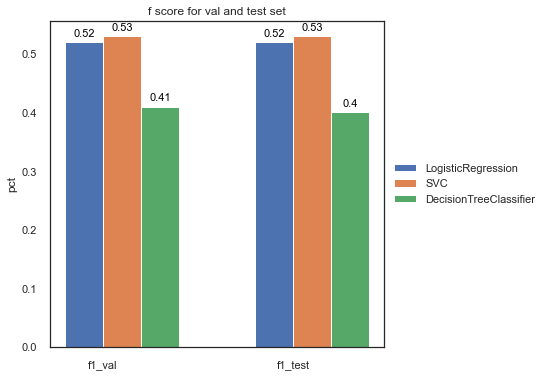

In [359]:
labels = ['f1_val', 'f1_test']
y_label = 'pct'
title = 'f score for val and test set'
eval_plot(labels, y_label, title,clf_evaluation_undSamp_cluster)



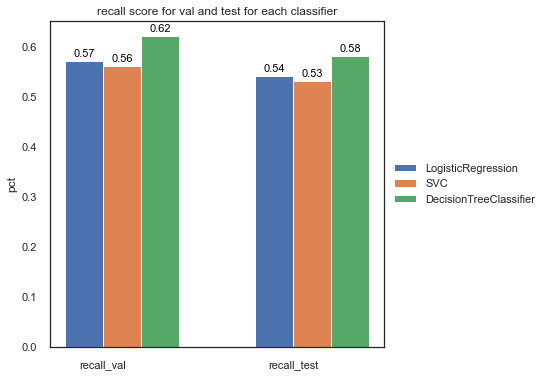

In [358]:
labels = ['recall_val', 'recall_test']
y_label = 'pct'
title = 'recall score for val and test for each classifier'
eval_plot(labels, y_label, title,clf_evaluation_undSamp_cluster)

#### trying ensemble methods

In [360]:
# for storing results of random forest,xgboost and catboost
clf_evaluation_ensemble_clustunder={}
clf_report_ensemble_clustunder={}

##### random Forest

In [362]:
clf_evaluation_ensemble_clustunder["random forest"] = train_predict(clf_RF,X_downsampled_clust, X_val, y_val,y_downsampled_clus,X_test,y_test)[0]
clf_report_ensemble_clustunder["Random Forest"] = train_predict(clf_RF,X_downsampled_clust, X_val, y_val, y_downsampled_clus,X_test,y_test)[1]

##### xgboost

In [363]:
clf_evaluation_ensemble_clustunder["xgboost"] = train_predict(clf_xgb,X_downsampled_clust, X_val, y_val,y_downsampled_clus,X_test,y_test)[0]
clf_report_ensemble_clustunder["xgboost"] = train_predict(clf_xgb,X_downsampled_clust, X_val, y_val, y_downsampled_clus,X_test,y_test)[1]

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[00:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "random_seed", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




C:\Users\NourhanElaraby\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[00:13:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "random_seed", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




##### catboost

In [364]:
clf_evaluation_ensemble_clustunder["catboost"] = train_predict(clf_catboost,X_downsampled_clust, X_val, y_val,y_downsampled_clus,X_test,y_test)[0]
clf_report_ensemble_clustunder["catboost"] = train_predict(clf_catboost,X_downsampled_clust, X_val, y_val, y_downsampled_clus,X_test,y_test)[1]

In [365]:
for key in clf_report_ensemble_clustunder:
    print(key)
    print(clf_report_ensemble_clustunder[key])
    print('---------------------------------------------------------')

Random Forest
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4206
           1       0.44      0.63      0.52      1194

    accuracy                           0.74      5400
   macro avg       0.66      0.70      0.67      5400
weighted avg       0.78      0.74      0.75      5400

---------------------------------------------------------
xgboost
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      4206
           1       0.46      0.64      0.53      1194

    accuracy                           0.75      5400
   macro avg       0.67      0.71      0.68      5400
weighted avg       0.79      0.75      0.77      5400

---------------------------------------------------------
catboost
              precision    recall  f1-score   support

           0       0.88      0.77      0.82      4206
           1       0.44      0.64      0.52      1194

    accuracy                       

In [366]:
pd.DataFrame.from_dict(clf_evaluation_ensemble_clustunder)

,random forest,xgboost,catboost
train_time,0.51,0.84,52.77
pred_time,0.61,0.03,0.04
acc_train,1.00,0.76,0.94
acc_val,0.74,0.75,0.74
acc_test,0.74,0.76,0.75
precision,0.44,0.46,0.44
recall_train,1.00,0.69,0.92
recall_val,0.63,0.64,0.64
recall_test,0.63,0.62,0.62
f1_train,1.00,0.74,0.94


In [367]:
#this should be set to be used for eval_plot
legend=[]
clf_ensemble=["random forest","xgboost","catboost"]
for i in clf_ensemble:
    legend.append(i)

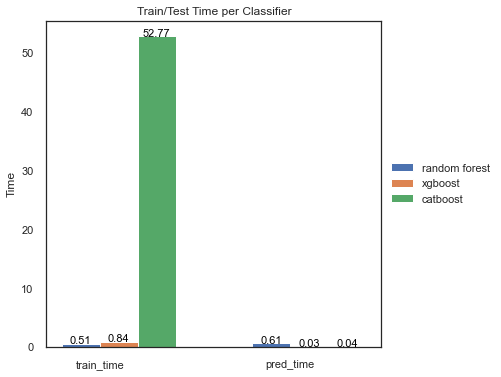

In [368]:
labels = ['train_time', 'pred_time']
y_label = 'Time'
title = 'Train/Test Time per Classifier'
eval_plot(labels, y_label, title,clf_evaluation_ensemble_clustunder)

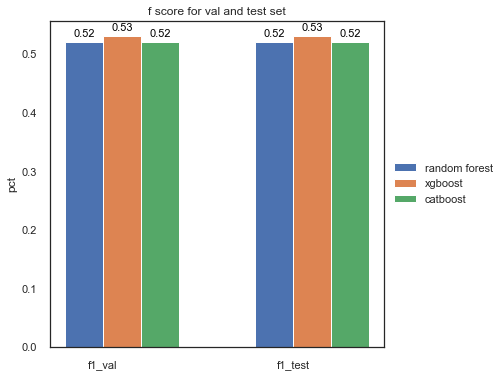

In [370]:
labels = ['f1_val', 'f1_test']
y_label = 'pct'
title = 'f score for val and test set'
eval_plot(labels, y_label, title,clf_evaluation_ensemble_clustunder)

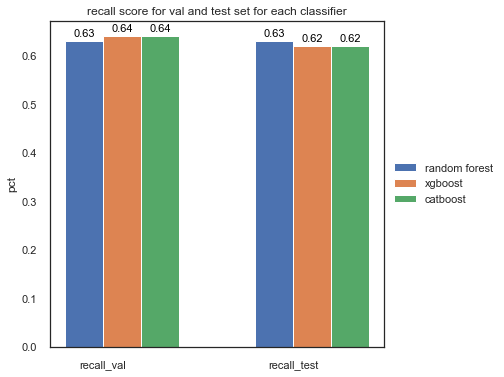

In [371]:
labels = ['recall_val', 'recall_test']
y_label = 'pct'
title = 'recall score for val and test set for each classifier'
eval_plot(labels, y_label, title,clf_evaluation_ensemble_clustunder)

Though both the `random undersampling` and `cluster centroids` give the same results,I prefer using `clusterCentroids` to random undersampling

## OverSampling

<img src="https://github.com/nourhanelaraby/DefaultCreditCardPrediction/blob/main/images/oversampling_techniques.PNG?raw=true" width="550" />
<div align="center"><font size=2> <i>different oversampling techniques</i> </font></div>


### Random Oversampling

Random over-sampling consists in extracting at random samples from the minority class, until they reach a certain proportion compared to the majority class, typically 50:50, or in other words, a balancing ratio of 1.

In Random over-sampling, we extract samples from the minority class at random, with replacement,**it increases likelihood of overfitting**
solution to this ,changing balancing ratio  that's why I chose smote over random sampling

### SMOTE :SAMPLE Generation

In [372]:
# defining smote
sm = SMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5,
    n_jobs=4
)

In [373]:
X_train, X_val, y_train, y_val,X_test,y_test=splitData(data_df)
X_train_scaled ,X_val_scaled,X_test_scaled=scaleFeatures(X_train ,X_val,X_test)
X_train_ohe ,X_val_ohe,X_test_ohe=oneHotEncodeData(X_train, X_val,X_test)
X_train,X_val,X_test=concatenateData()
X_res, y_res = sm.fit_resample(X_train, y_train)

#### logistic reg,svc,DT

In [374]:
#defining classifiers
clf_LR = LogisticRegression(random_state=RANDOM_STATE,max_iter=150,n_jobs=-1)
clf_SVM = SVC(random_state=RANDOM_STATE)
clf_DT = DecisionTreeClassifier(random_state=RANDOM_STATE)
clf_list=[clf_LR,clf_SVM,clf_DT]

In [375]:
clf_evaluation_smote = {}
clf_report_smote = {}

for clf in clf_list:
    clf_evaluation_smote[clf.__class__.__name__] = train_predict(clf,X_res, X_val, y_val,y_res,X_test,y_test)[0]
    clf_report_smote[clf.__class__.__name__] = train_predict(clf,X_res, X_val, y_val, y_res,X_test,y_test)[1]

In [376]:
for key in clf_report_smote:
    print(key)
    print(clf_report_smote[key])
    print('---------------------------------------------------------')

LogisticRegression
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4206
           1       0.52      0.52      0.52      1194

    accuracy                           0.79      5400
   macro avg       0.69      0.69      0.69      5400
weighted avg       0.79      0.79      0.79      5400

---------------------------------------------------------
SVC
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4206
           1       0.51      0.54      0.52      1194

    accuracy                           0.78      5400
   macro avg       0.69      0.69      0.69      5400
weighted avg       0.79      0.78      0.79      5400

---------------------------------------------------------
DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.84      0.77      0.80      4206
           1       0.36      0.47      0.41      1194

    accuracy        

In [377]:
pd.DataFrame.from_dict(clf_evaluation_smote)

,LogisticRegression,SVC,DecisionTreeClassifier
train_time,2.96,50.70,0.63
pred_time,0.02,98.17,0.02
acc_train,0.75,0.75,1.00
acc_val,0.79,0.78,0.70
acc_test,0.79,0.79,0.70
precision,0.52,0.51,0.36
recall_train,0.63,0.64,1.00
recall_val,0.52,0.54,0.47
recall_test,0.49,0.52,0.44
f1_train,0.72,0.72,1.00


In [378]:
#this should be set to be used for eval_plot
legend=[]
for i in range(len(clf_list)):
    legend.append(clf_list[i].__class__.__name__)

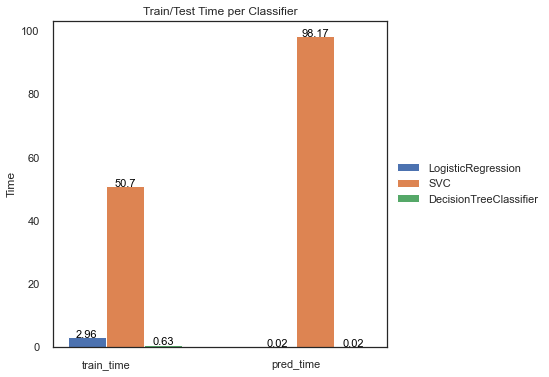

In [379]:
labels = ['train_time', 'pred_time']
y_label = 'Time'
title = 'Train/Test Time per Classifier'
eval_plot(labels, y_label, title,clf_evaluation_smote)

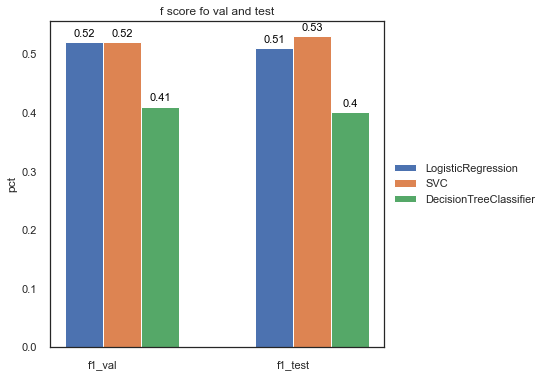

In [380]:
labels = ['f1_val', 'f1_test']
y_label = 'pct'
title = 'f score fo val and test'
eval_plot(labels, y_label, title,clf_evaluation_smote)

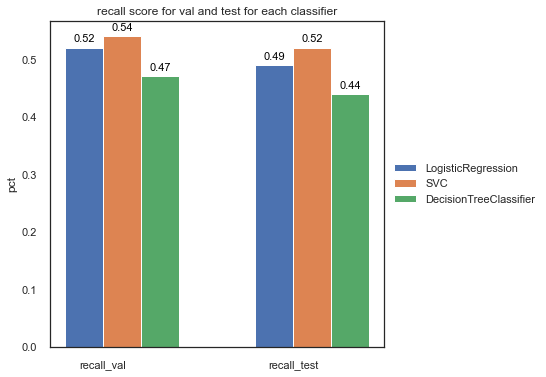

In [381]:
labels = ['recall_val', 'recall_test']
y_label = 'pct'
title = 'recall score for val and test for each classifier'
eval_plot(labels, y_label, title,clf_evaluation_smote)

#### trying ensemble methods

In [392]:
clf_RF = RandomForestClassifier(n_jobs=-1, 
                             random_state=RANDOM_STATE, criterion='gini',
                             n_estimators=100,
                             verbose=False)
clf_xgb= XGBClassifier(objective='binary:logistic',eta=0.039,silent=True,
                       subsample=0.8,colsample_bytree=0.9,random_seed = RANDOM_STATE,use_label_encoder =False
                       ,eval_metric='auc')
clf_catboost=CatBoostClassifier(silent = True,iterations=500,
                             learning_rate=0.02,
                             depth=12,
                             eval_metric='AUC',
                             random_seed = RANDOM_STATE,
                             bagging_temperature = 0.2 )

In [383]:
clf_evaluation_ensemble_smote={}
clf_report_ensemble_smote={}

In [384]:
#for random forest
clf_evaluation_ensemble_smote["random forest"] = train_predict(clf_RF,X_res, X_val, y_val,y_res,X_test,y_test )[0]
clf_report_ensemble_smote["random forest"] = train_predict(clf_RF,X_res, X_val, y_val,y_res,X_test,y_test)[1]

In [394]:
clf_evaluation_ensemble_smote["xgboost"] = train_predict(clf_xgb,X_res, X_val, y_val,y_res,X_test,y_test)[0]
clf_report_ensemble_smote["xgboost"] = train_predict(clf_xgb,X_res, X_val, y_val,y_res,X_test,y_test)[1]

[01:07:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "random_seed", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[01:07:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "random_seed", "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [386]:
clf_evaluation_ensemble_smote["catboost"] = train_predict(clf_catboost,X_res, X_val, y_val,y_res,X_test,y_test)[0]
clf_report_ensemble_smote["catboost"] = train_predict(clf_catboost,X_res, X_val, y_val, y_res,X_test,y_test)[1]

In [387]:
pd.DataFrame.from_dict(clf_evaluation_ensemble_smote)

,random forest,xgboost,catboost
train_time,1.35,2.40,110.75
pred_time,0.34,0.03,0.06
acc_train,1.00,0.83,0.92
acc_val,0.79,0.79,0.80
acc_test,0.79,0.80,0.81
precision,0.53,0.53,0.56
recall_train,1.00,0.78,0.88
recall_val,0.49,0.53,0.49
recall_test,0.45,0.53,0.48
f1_train,1.00,0.82,0.91


In [388]:
#this should be set to be used for eval_plot
legend=[]
clf_list_ensemble=["random forest","xgboost","catboost"]
for i in clf_list_ensemble:
    legend.append(i)

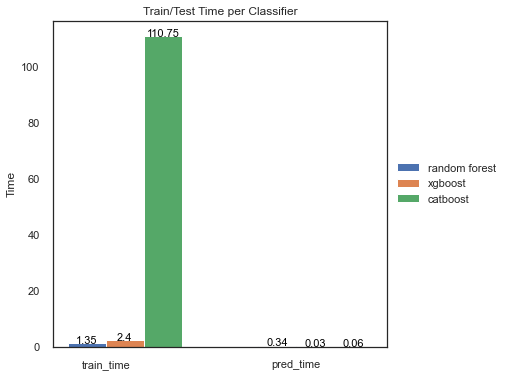

In [389]:
labels = ['train_time', 'pred_time']
y_label = 'Time'
title = 'Train/Test Time per Classifier'
eval_plot(labels, y_label, title,clf_evaluation_ensemble_smote)


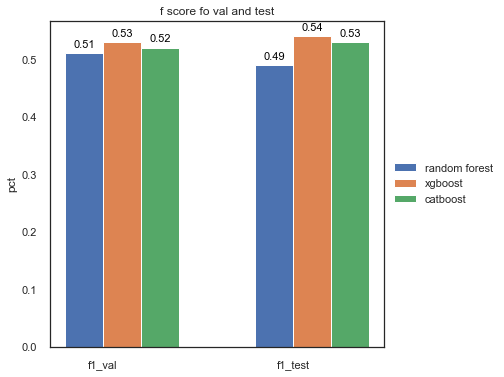

In [390]:
labels = ['f1_val', 'f1_test']
y_label = 'pct'
title = 'f score fo val and test'
eval_plot(labels, y_label, title,clf_evaluation_ensemble_smote)


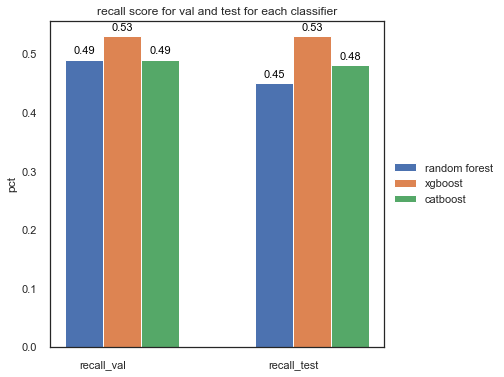

In [391]:
labels = ['recall_val', 'recall_test']
y_label = 'pct'
title = 'recall score for val and test for each classifier'
eval_plot(labels, y_label, title,clf_evaluation_ensemble_smote)

Results

`Smote` gave worse results than undersampling and passing parameter `class_weight` to classifiers



The best approach is to use class weights

in most cases,this gives better results, since there is no information loss by undersampling or performance loss and introduction of noise by oversampling.
SMOTE has some associated issues, such as the problem of overgeneralisation (the new synthetic examples may be generated in overlapping areas)
